<a id="lb"></a>

<div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
  <b>PROJET MACHINE LEARNING: STUDENT PERFORMANCE</b>
</div>

# <font color='#007BFF'>Table des matières</font><a class='anchor' id='top'></a>
1. [Compréhension du problème](#comprehension-du-probleme)
2. [Présentation de la base](#présentation-de-la-base)
3. [Analyse exploratoire des données (EDA)](#analyse-exploratoire-des-donnees-eda)
4. [Train / test split](#Train-/-test-split)
5. [Feature engineering](#feature-engineering)  
6. [Modélisation](#modélisation)  
7. [Comparaison](#comparaison)  
8. [Feature importance](#feature-importance)  

<a class='anchor' id="Problem"></a> [↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>1. Compréhension du problème</b></div>

Le jeu de données explore divers facteurs qui influencent la performance des élèves aux examens, en se concentrant sur un éventail d’éléments tels que 
les habitudes d’étude, l’assiduité, l’implication des parents, l’accès aux ressources, les activités extrascolaires, et bien d’autres encore. 
Chacune de ces variables joue un rôle dans la détermination des résultats scolaires des élèves.

En analysant les tendances parmi ces facteurs, l’objectif est d’identifier ceux qui sont les meilleurs prédicteurs de la réussite. 
Le but est de faire émerger des pistes d’action concrètes pouvant orienter les stratégies éducatives et les interventions visant à améliorer les performances scolaires.

Cette compréhension pourrait être utile aux enseignants, aux décideurs politiques et aux parents pour favoriser des résultats académiques plus 
performants.

#### <a class='anchor' id='Exploration'></a>[↑](#top)
# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  2.  Présentation de la base </b></div>

#### Les packages

In [1]:
# Système et chemins
from pathlib import Path

# Manipulation de données
import numpy as np
import pandas as pd

# Analyse statistique
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import missingno as msno
import shap
from yellowbrick.regressor import ResidualsPlot

# Prétraitement
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modélisation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Évaluation et sélection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Profiling exploratoire
from ydata_profiling import ProfileReport


#### Librairie pour l'ouverture de la base

In [2]:
!pip install pandas openpyxl

Unable to create process using 'C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\python.exe "C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Scripts\pip-script.py" install pandas openpyxl'


#### Changement du repertoire de travail actuel

In [3]:
!cd

C:\Users\Easy Services Pro\OneDrive\Bureau\ENSAE_ISEP2\Semestre2\Informatique\Initiation … la machine learning


#### Repertoire de travail 

In [4]:
repertoire_actuel = Path.cwd()
add_subrepert_base = Path(repertoire_actuel, "base")
add_subrepert_base.mkdir(parents=True, exist_ok=True)
print(f"Work directory: {repertoire_actuel} \nData directory: {add_subrepert_base}")


Work directory: C:\Users\Easy Services Pro\OneDrive\Bureau\ENSAE_ISEP2\Semestre2\Informatique\Initiation à la machine learning 
Data directory: C:\Users\Easy Services Pro\OneDrive\Bureau\ENSAE_ISEP2\Semestre2\Informatique\Initiation à la machine learning\base


#### Importation de la base

In [5]:
#Nous voulons créer une variable qui contient notre base de donnée
base_url= "https://github.com/KadidjaGUEBEDIANG/project-machine-learning-student-performance/raw/main/StudentPerformanceFactors.xlsx"#les données sont disponibles sur github dans le compte kadidjaGUEBEDIANG 
base= pd.read_excel(base_url, engine="openpyxl")#la variable base contient notre base de donnée

#### Présentation des 5 premières observations

In [6]:
base.head(5)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

#### Nombre de ligne et de colonne de la base

In [7]:
base.shape

(6607, 20)

#### Informations à propos de cette base

In [8]:
base.info()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

#### Nombre de variables qualitatives et quantitatives

In [9]:
print("Le nombre de variables numériques est :", base.select_dtypes(include='number').shape[1])
print("Le nombre de variables catégorielles est :", base.select_dtypes(include='object').shape[1])

Le nombre de variables numériques est : 7
Le nombre de variables catégorielles est : 13


#### Caractéristiques des variables quantitatives

In [10]:
base.describe(include="int64")

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

#### Caractéristiques des variables quantitatives

In [11]:
base.describe(include="object")

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                  6607                6607                       6607   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                   3362                3319                       3938   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count              6607            6607          6607            6529   
unique                3               2             3               3   
top              Medium             Yes           Low          Medium   
freq               3351            6108          2672            3925   

       School_Type Peer_Influence Learning_Disabilities  \
count         6607           6607                  6607   
unique           2              3                     2   
top         Public       Positive                    No   
freq          4598           2638                  5912   

       Parental_Education_Level Distance_from_Home Gender  
count                      6517               6540   6607  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                       3223               3884   3814

#### Présentons les modalités des variables qualitatives

In [12]:
# Sélection des variables qualitatives
qual_vars = base.select_dtypes(include='object')

# Affichage des modalités pour chaque variable
for col in qual_vars.columns:
    print(f"Modalités de '{col}' ({base[col].nunique()} modalités) :")
    print(base[col].unique())
    print("-" * 40)


Modalités de 'Parental_Involvement' (3 modalités) :
['Low' 'Medium' 'High']
----------------------------------------
Modalités de 'Access_to_Resources' (3 modalités) :
['High' 'Medium' 'Low']
----------------------------------------
Modalités de 'Extracurricular_Activities' (2 modalités) :
['No' 'Yes']
----------------------------------------
Modalités de 'Motivation_Level' (3 modalités) :
['Low' 'Medium' 'High']
----------------------------------------
Modalités de 'Internet_Access' (2 modalités) :
['Yes' 'No']
----------------------------------------
Modalités de 'Family_Income' (3 modalités) :
['Low' 'Medium' 'High']
----------------------------------------
Modalités de 'Teacher_Quality' (3 modalités) :
['Medium' 'High' 'Low' nan]
----------------------------------------
Modalités de 'School_Type' (2 modalités) :
['Public' 'Private']
----------------------------------------
Modalités de 'Peer_Influence' (3 modalités) :
['Positive' 'Negative' 'Neutral']
------------------------------

#### Conclusion de la présentation de la base
Nous pouvons conclure cette première exploration en notant que notre base contient 6607 observations réparties sur 20 variables. Parmi celles-ci, 13 sont de type catégoriel et 7 numériques. La variable cible,Exam_Score, est numérique, ce qui oriente l’analyse vers un problème de régression.
Maintenant, explorons les données.

#### <a class='anchor' id='EDA'></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  3. Analyse exploratoire des données (EDA) </b></div>


#### Valeurs manquantes

<Figure size 1000x600 with 0 Axes>

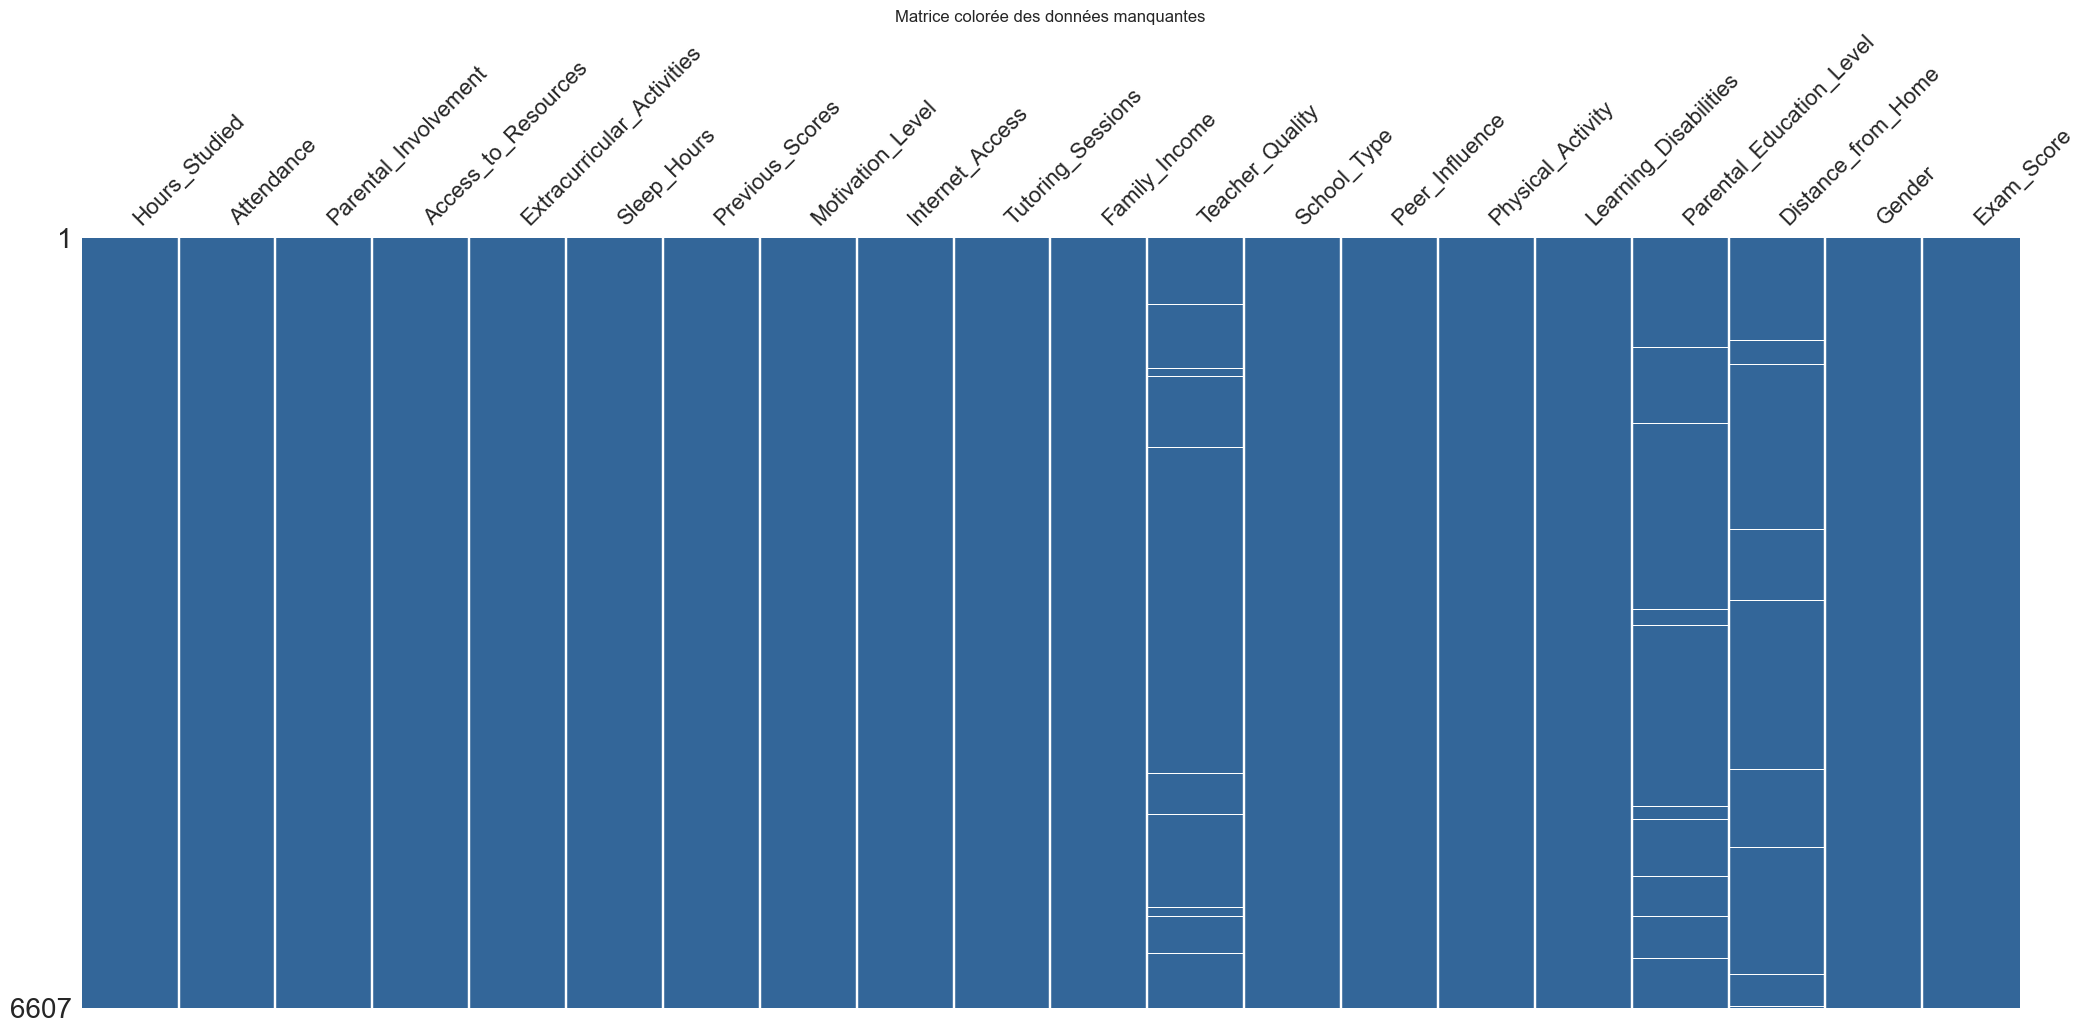

In [13]:
# Visualiser les données manquantes avec une matrice graphique
# Définir un arrière-plan coloré et un style d'affichage
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Appliquer un style de grille avec Seaborn

# Matrice colorée pour les valeurs manquantes
msno.matrix(base, sparkline=False, color=(0.2, 0.4, 0.6))  # Couleur RGB personnalisée pour les barres
plt.gca().set_facecolor((0.9, 0.9, 0.9))  # Arrière-plan gris clair
plt.title("Matrice colorée des données manquantes")
plt.show()

In [14]:
nb_obs_manquantes = base.isnull().any(axis=1).sum()
total_obs = base.shape[0]
pourcentage = round((nb_obs_manquantes / total_obs) * 100, 2)

print(f"Nombre d'observations contenant au moins une valeur manquante : {nb_obs_manquantes} sur {total_obs} ({pourcentage}%)")


Nombre d'observations contenant au moins une valeur manquante : 229 sur 6607 (3.47%)


In [15]:
missing_values = base.isnull().sum()
missing_values = missing_values[missing_values > 0]

for col, nb in missing_values.items():
    pourcentage = (nb / len(base)) * 100
    print(f"La variable '{col}' contient {nb} valeurs manquantes, soit {pourcentage:.2f}% des observations.")


La variable 'Teacher_Quality' contient 78 valeurs manquantes, soit 1.18% des observations.
La variable 'Parental_Education_Level' contient 90 valeurs manquantes, soit 1.36% des observations.
La variable 'Distance_from_Home' contient 67 valeurs manquantes, soit 1.01% des observations.


#### Vérification des lignes dupliquées

In [16]:
# Calculer le nombre de lignes dupliquées dans le DataFrame.
# Cela permet d'identifier et de comprendre l'étendue de la redondance dans les données.
# Supprimer les doublons est crucial pour assurer l'intégrité et la précision de notre analyse.
# La fonction sum() renverra le nombre total de lignes dupliquées.
base.duplicated().sum()

0

#### Analyse de la variable cible

In [17]:
base['Exam_Score'].describe()

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64

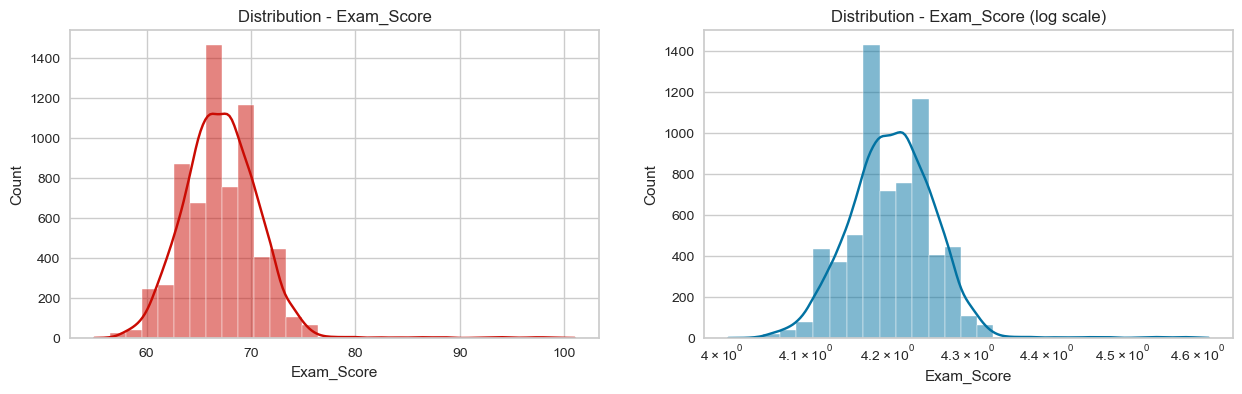

In [18]:
# --- COMPARAISON : ÉCHELLE LINÉAIRE VS LOGARITHMIQUE ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))  # Crée deux graphiques côte à côte
sns.histplot(base["Exam_Score"], color='r', kde=True, bins=30, ax=axes[0])  # Histogramme classique
axes[0].set_title('Distribution - Exam_Score')  # Titre

# Vérifie que les valeurs sont strictement positives avant transformation log
if (base["Exam_Score"] > 0).all():
    sns.histplot(np.log(base["Exam_Score"]), color='b', kde=True, bins=30, ax=axes[1])  # Histogramme après transformation log
    axes[1].set_title('Distribution - Exam_Score (log scale)')  # Titre
    axes[1].set_xscale('log')  # Échelle logarithmique
plt.show()  # Affiche les deux graphiques


In [19]:
skewness = base['Exam_Score'].skew()
print(f"Asymétrie (skewness) de la variable 'Exam_Score' : {skewness:.2f}")

if skewness > 1:
    print("Forte asymétrie positive (longue traîne à droite)")
elif 0.5 < skewness <= 1:
    print("Asymétrie positive modérée")
elif -0.5 <= skewness <= 0.5:
    print("Distribution à peu près symétrique")
elif -1 <= skewness < -0.5:
    print("Asymétrie négative modérée (longue traîne à gauche)")
else:
    print("Forte asymétrie négative")


Asymétrie (skewness) de la variable 'Exam_Score' : 1.64
Forte asymétrie positive (longue traîne à droite)


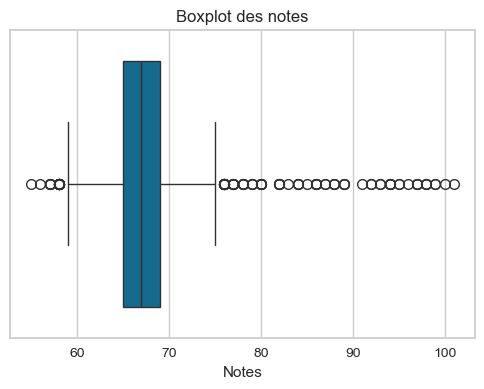

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x=base['Exam_Score'])
plt.title("Boxplot des notes")
plt.xlabel("Notes")
plt.show()


In [21]:
Q1 = base['Exam_Score'].quantile(0.25)
Q3 = base['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

outliers = base[(base['Exam_Score'] < borne_inf) | (base['Exam_Score'] > borne_sup)]
print(f"{len(outliers)} observations aberrantes détectées")


104 observations aberrantes détectées


In [22]:
outliers['Distance_from_Home'].value_counts(normalize=True)
base['Distance_from_Home'].value_counts(normalize=True)

Distance_from_Home
Near        0.593884
Moderate    0.305505
Far         0.100612
Name: proportion, dtype: float64

In [23]:
Q1 = base['Exam_Score'].quantile(0.25)
Q3 = base['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

upper_outliers = base[(base['Exam_Score'] > borne_sup)]


In [24]:
upper_outliers.shape

(76, 20)

In [25]:
upper_outliers.describe()


Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
count      76.000000   76.000000    76.000000        76.000000   
mean       23.947368   84.434211     6.921053        76.171053   
std         8.567994   12.278258     1.421390        15.988653   
min         1.000000   61.000000     4.000000        52.000000   
25%        18.000000   73.750000     6.000000        59.750000   
50%        24.500000   88.500000     7.000000        76.500000   
75%        30.000000   96.000000     8.000000        91.000000   
max        43.000000  100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity  Exam_Score  
count          76.000000          76.000000   76.000000  
mean            1.907895           2.815789   84.921053  
std             1.642580           1.139714    8.077563  
min             0.000000           0.000000   76.000000  
25%             1.000000           2.000000   77.000000  
50%             2.000000           3.000000   83.500000  
75%             2.250000           3.250000   92.250000  
max             6.000000           5.000000  101.000000

In [26]:
upper_outliers.describe(include='object')

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                    76                  76                         76   
unique                    3                   3                          2   
top                    High              Medium                        Yes   
freq                     36                  34                         51   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count                76              76            76              76   
unique                3               2             3               3   
top              Medium             Yes        Medium          Medium   
freq                 38              69            28              40   

       School_Type Peer_Influence Learning_Disabilities  \
count           76             76                    76   
unique           2              3                     2   
top         Public       Positive                    No   
freq            52             33                    65   

       Parental_Education_Level Distance_from_Home Gender  
count                        76                 76     76  
unique                        3                  3      2  
top                 High School               Near   Male  
freq                         36                 48     40

In [27]:
Q1 = base['Exam_Score'].quantile(0.25)
Q3 = base['Exam_Score'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

lower_outliers = base[(base['Exam_Score'] < borne_inf)]


In [28]:
lower_outliers.shape

(28, 20)

In [29]:
lower_outliers.describe()

Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
count      28.000000   28.000000    28.000000        28.000000   
mean        8.214286   64.107143     7.071429        67.750000   
std         4.573330    4.589354     1.274495        11.097631   
min         2.000000   60.000000     5.000000        51.000000   
25%         4.000000   61.000000     6.000000        61.750000   
50%         8.000000   62.500000     7.000000        67.000000   
75%        12.250000   66.250000     8.000000        73.750000   
max        17.000000   79.000000    10.000000        93.000000   

       Tutoring_Sessions  Physical_Activity  Exam_Score  
count          28.000000          28.000000   28.000000  
mean            0.607143           2.214286   57.678571  
std             0.831745           0.994695    0.722832  
min             0.000000           0.000000   55.000000  
25%             0.000000           2.000000   58.000000  
50%             0.000000           2.000000   58.000000  
75%             1.000000           3.000000   58.000000  
max             3.000000           4.000000   58.000000

In [30]:
lower_outliers.describe(include='object')

Parental_Involvement Access_to_Resources Extracurricular_Activities  \
count                    28                  28                         28   
unique                    3                   3                          2   
top                  Medium              Medium                        Yes   
freq                     17                  12                         15   

       Motivation_Level Internet_Access Family_Income Teacher_Quality  \
count                28              28            28              27   
unique                3               2             3               3   
top                 Low             Yes           Low          Medium   
freq                 15              24            18              20   

       School_Type Peer_Influence Learning_Disabilities  \
count           28             28                    28   
unique           2              3                     2   
top         Public        Neutral                    No   
freq            19             10                    20   

       Parental_Education_Level Distance_from_Home Gender  
count                        28                 28     28  
unique                        3                  3      2  
top                 High School           Moderate   Male  
freq                         16                 10     15

#### Analyse univariée


=== Analyse de la variable numérique : Hours_Studied ===
count    6607.000000
mean       19.975329
std         5.990594
min         1.000000
25%        16.000000
50%        20.000000
75%        24.000000
max        44.000000
Name: Hours_Studied, dtype: float64
Asymétrie (skewness) : 0.01


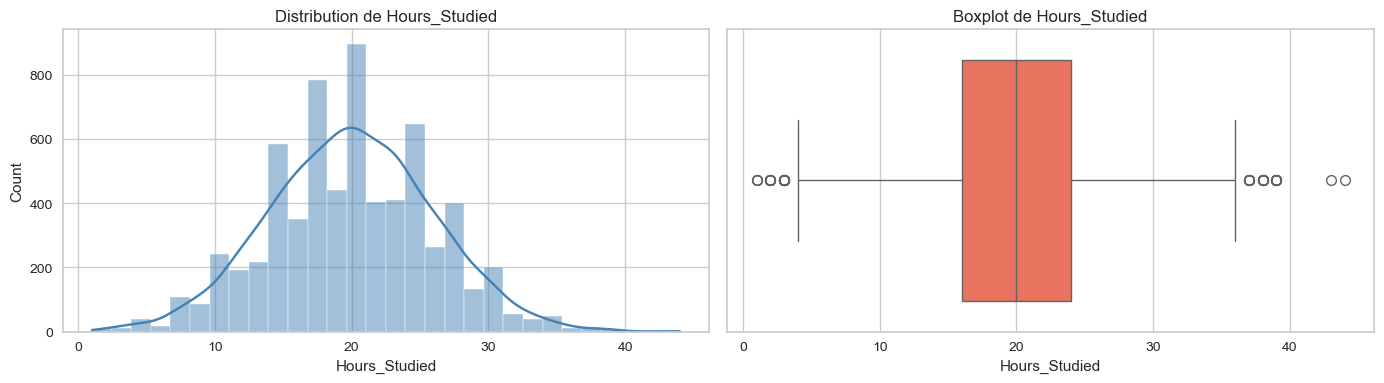


=== Analyse de la variable numérique : Attendance ===
count    6607.000000
mean       79.977448
std        11.547475
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64
Asymétrie (skewness) : 0.01


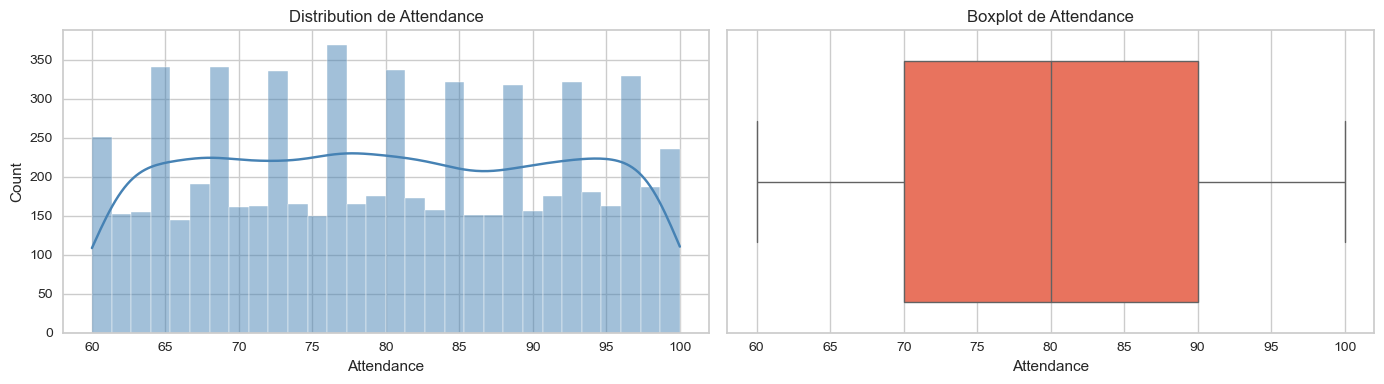


=== Analyse de la variable numérique : Sleep_Hours ===
count    6607.00000
mean        7.02906
std         1.46812
min         4.00000
25%         6.00000
50%         7.00000
75%         8.00000
max        10.00000
Name: Sleep_Hours, dtype: float64
Asymétrie (skewness) : -0.02


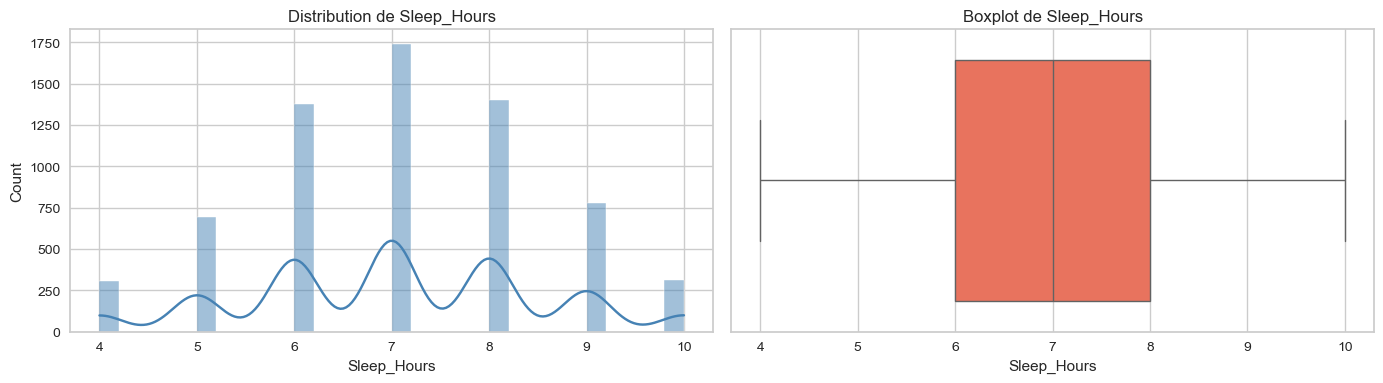


=== Analyse de la variable numérique : Previous_Scores ===
count    6607.000000
mean       75.070531
std        14.399784
min        50.000000
25%        63.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Previous_Scores, dtype: float64
Asymétrie (skewness) : -0.00


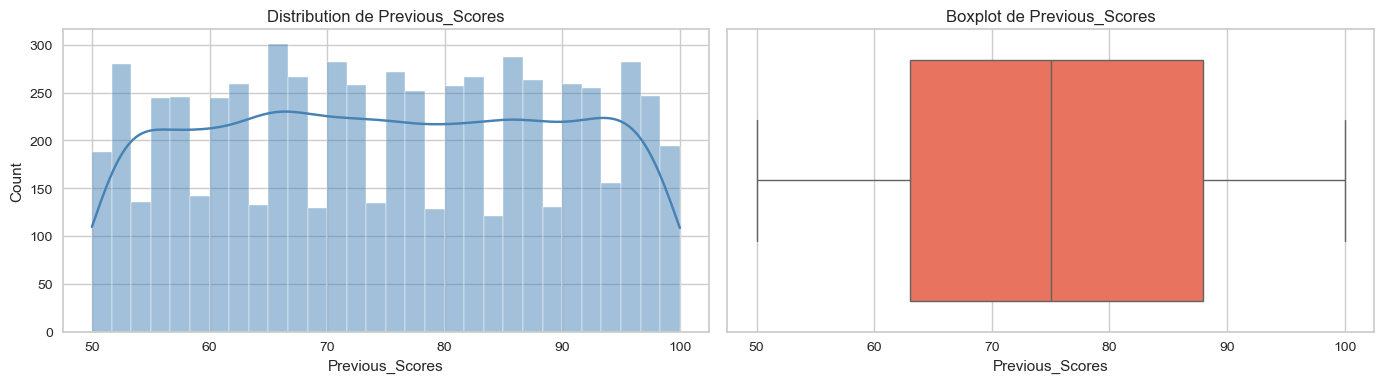


=== Analyse de la variable numérique : Tutoring_Sessions ===
count    6607.000000
mean        1.493719
std         1.230570
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: Tutoring_Sessions, dtype: float64
Asymétrie (skewness) : 0.82


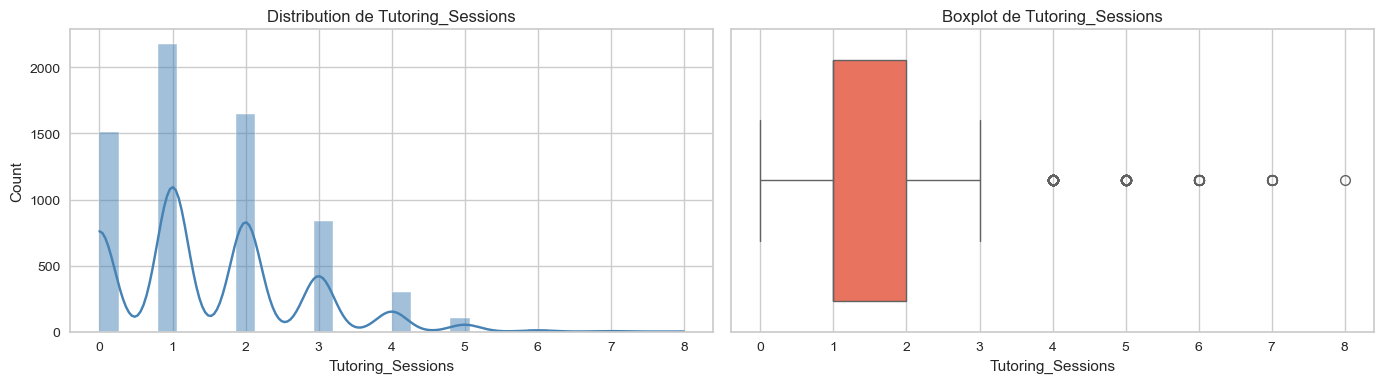


=== Analyse de la variable numérique : Physical_Activity ===
count    6607.000000
mean        2.967610
std         1.031231
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Physical_Activity, dtype: float64
Asymétrie (skewness) : -0.03


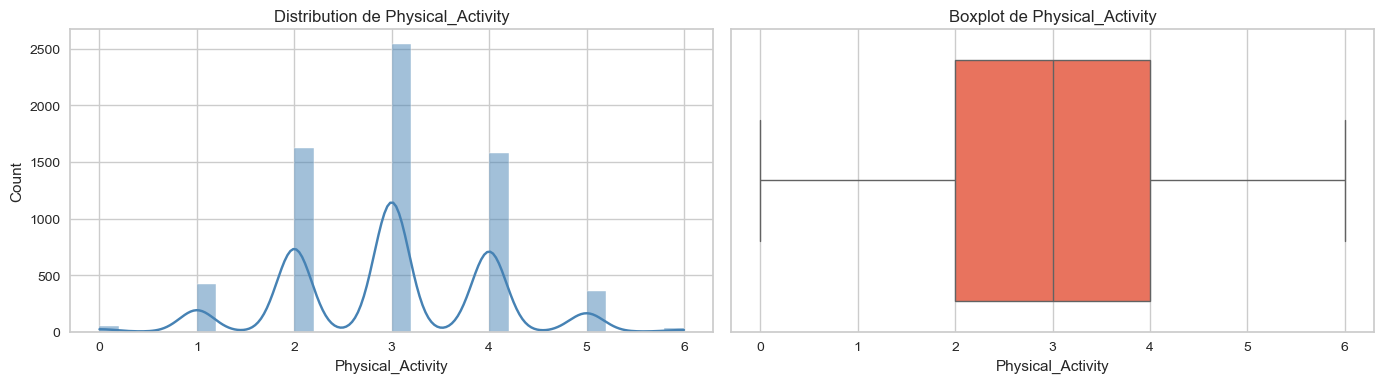

In [31]:
# Sélection des variables numériques
numeric_cols = base.select_dtypes(include='number').columns

for col in numeric_cols:
    if col != 'Exam_Score':
        print(f"\n=== Analyse de la variable numérique : {col} ===")
        print(base[col].describe())
        print(f"Asymétrie (skewness) : {base[col].skew():.2f}")
    
        # Visualisation
        fig, axs = plt.subplots(1, 2, figsize=(14, 4))

        sns.histplot(base[col], bins=30, kde=True, color='steelblue', ax=axs[0])
        axs[0].set_title(f"Distribution de {col}")

        sns.boxplot(x=base[col], ax=axs[1], color='tomato')
        axs[1].set_title(f"Boxplot de {col}")

        plt.tight_layout()
        plt.show()



=== Analyse de la variable qualitative : Parental_Involvement ===
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


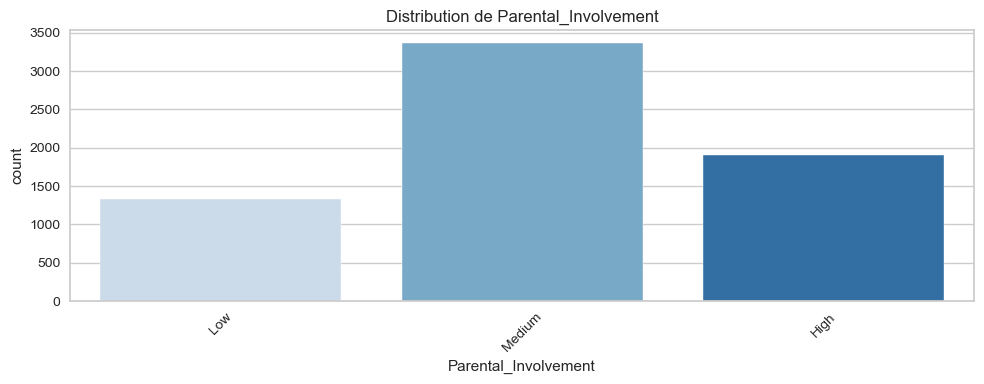


=== Analyse de la variable qualitative : Access_to_Resources ===
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


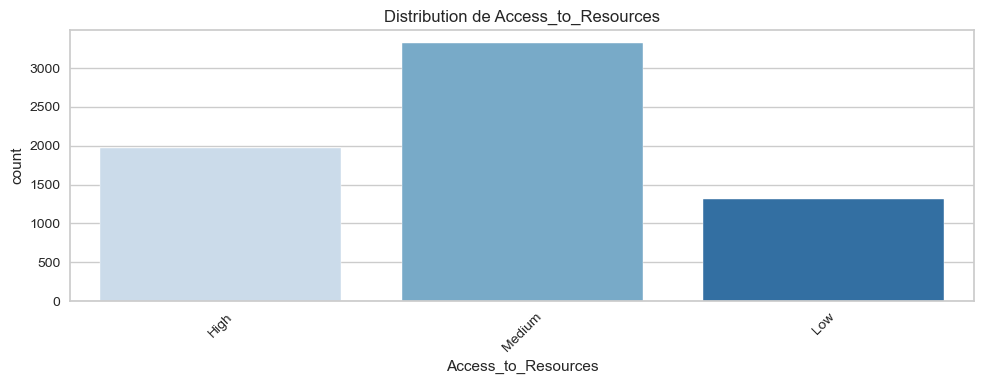


=== Analyse de la variable qualitative : Extracurricular_Activities ===
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


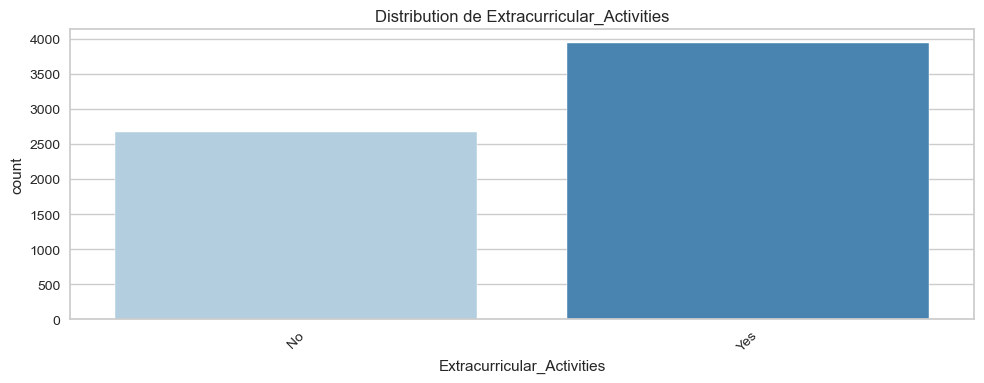


=== Analyse de la variable qualitative : Motivation_Level ===
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


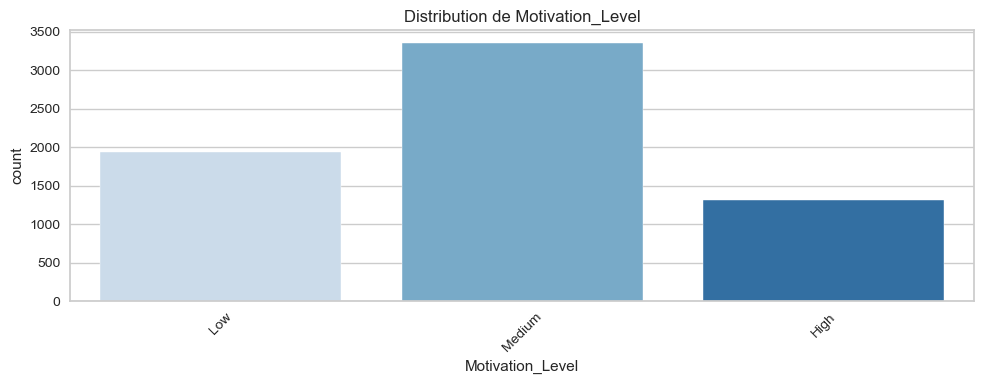


=== Analyse de la variable qualitative : Internet_Access ===
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


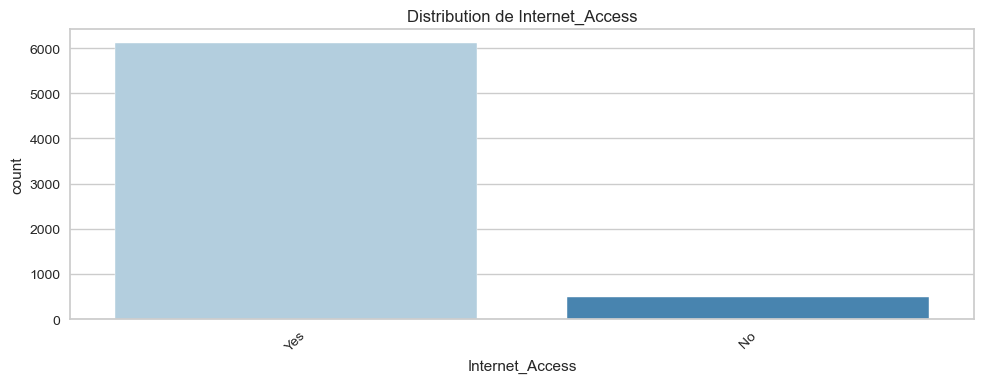


=== Analyse de la variable qualitative : Family_Income ===
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


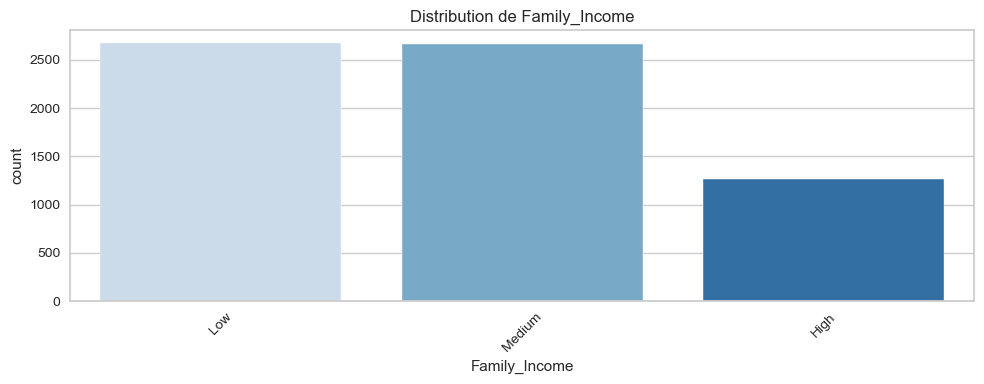


=== Analyse de la variable qualitative : Teacher_Quality ===
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


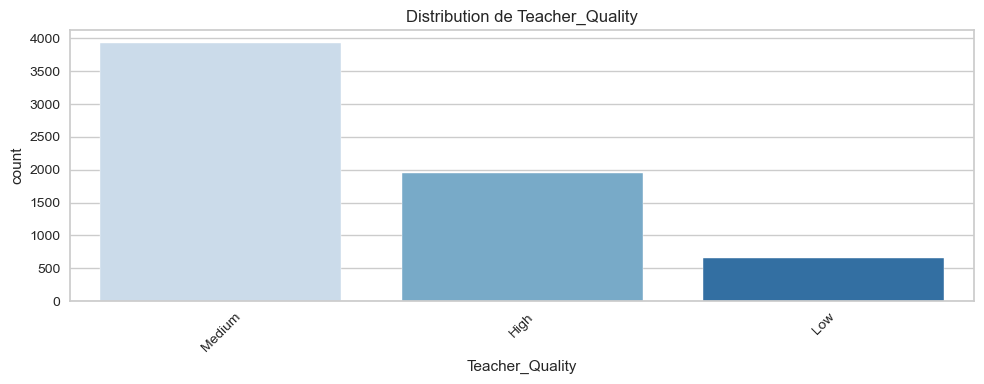


=== Analyse de la variable qualitative : School_Type ===
School_Type
Public     4598
Private    2009
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


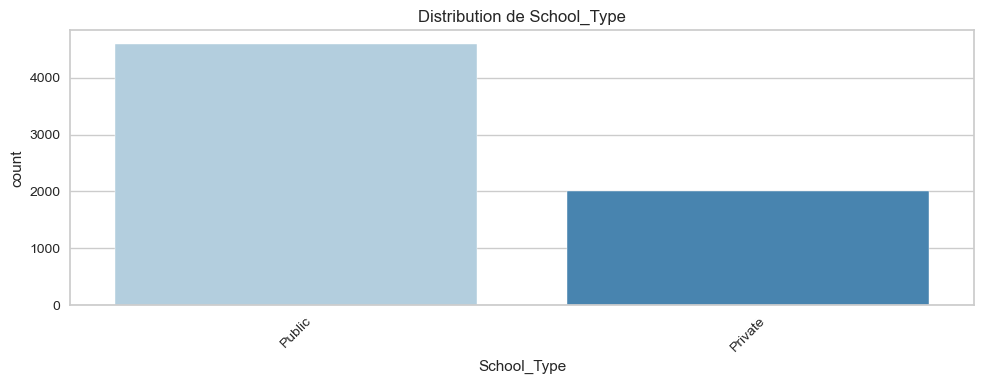


=== Analyse de la variable qualitative : Peer_Influence ===
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


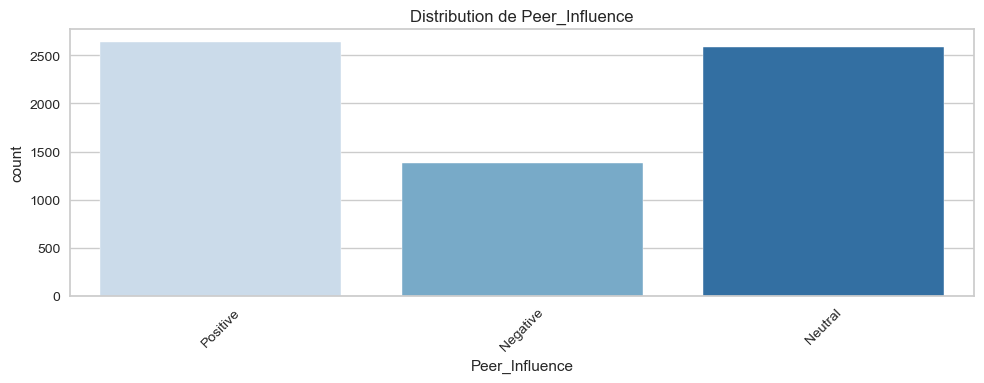


=== Analyse de la variable qualitative : Learning_Disabilities ===
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


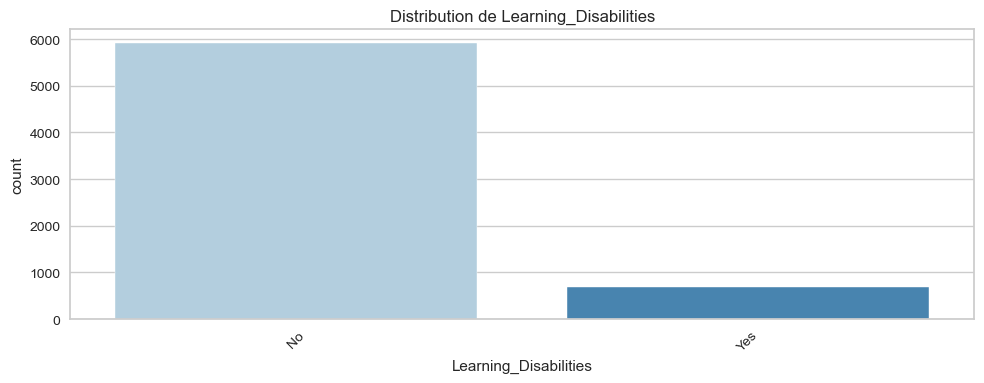

C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')



=== Analyse de la variable qualitative : Parental_Education_Level ===
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64


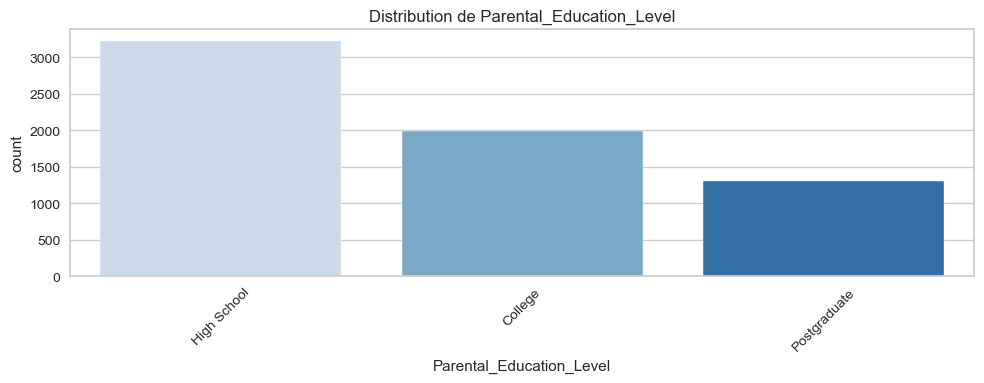


=== Analyse de la variable qualitative : Distance_from_Home ===
Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


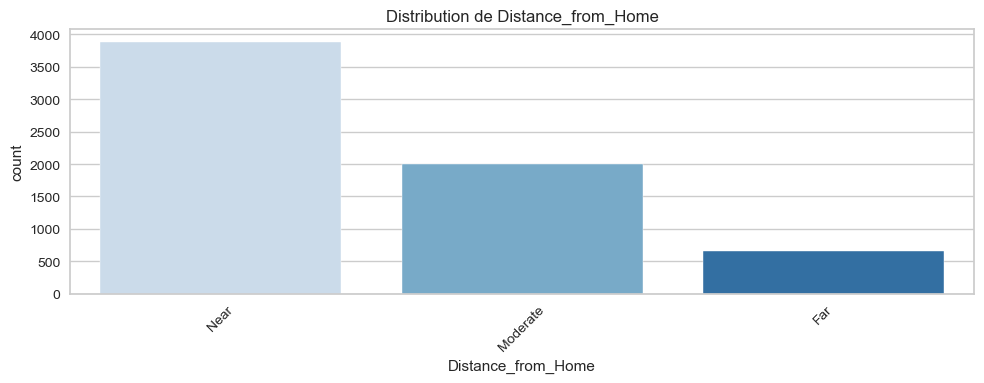


=== Analyse de la variable qualitative : Gender ===
Gender
Male      3814
Female    2793
Name: count, dtype: int64


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\243407733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=base, x=col, palette='Blues')


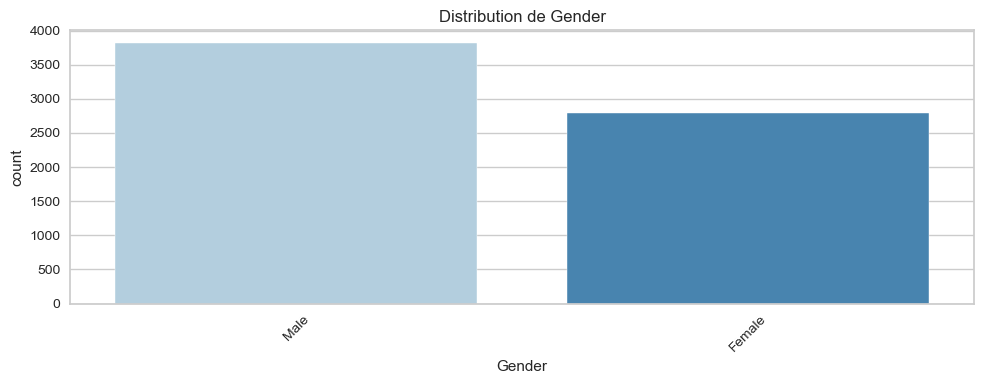

In [32]:
# Sélection des variables catégorielles
categorical_cols = base.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n=== Analyse de la variable qualitative : {col} ===")
    print(base[col].value_counts())
    
    # Visualisation
    plt.figure(figsize=(10, 4))
    sns.countplot(data=base, x=col, palette='Blues')
    plt.title(f"Distribution de {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### analyse bivariée

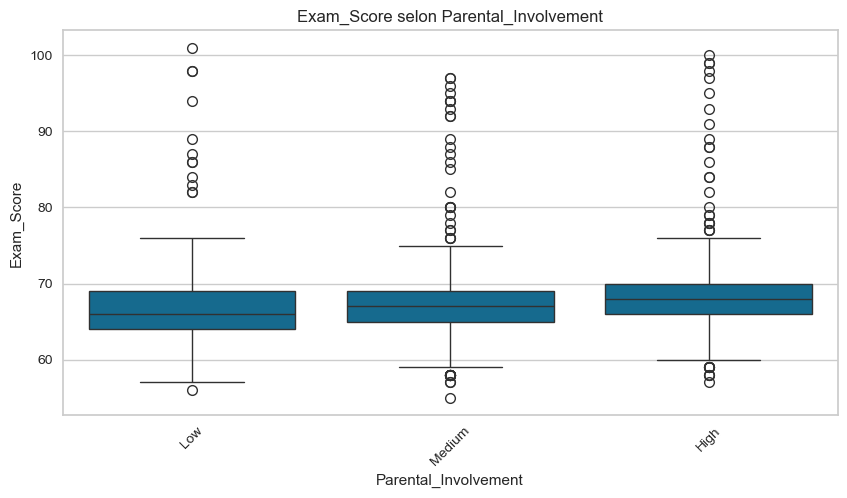

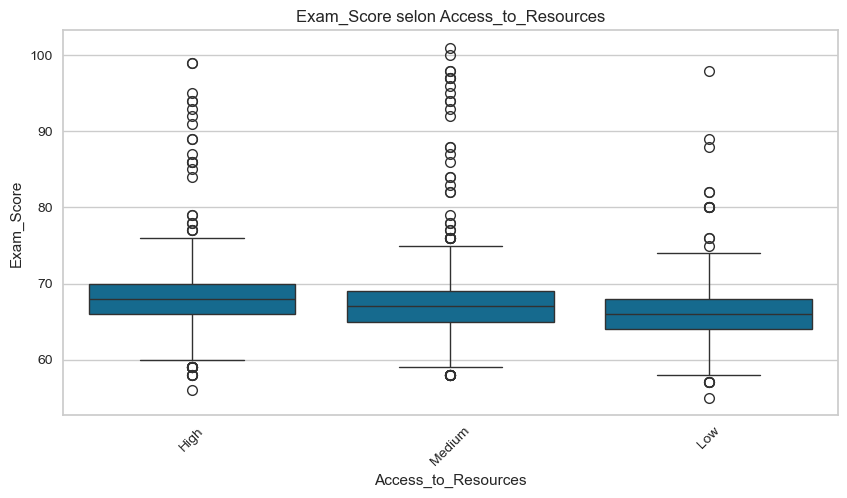

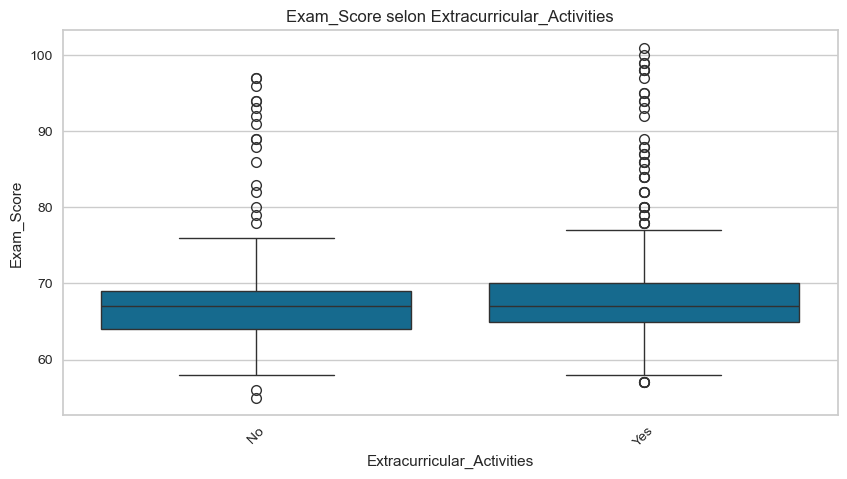

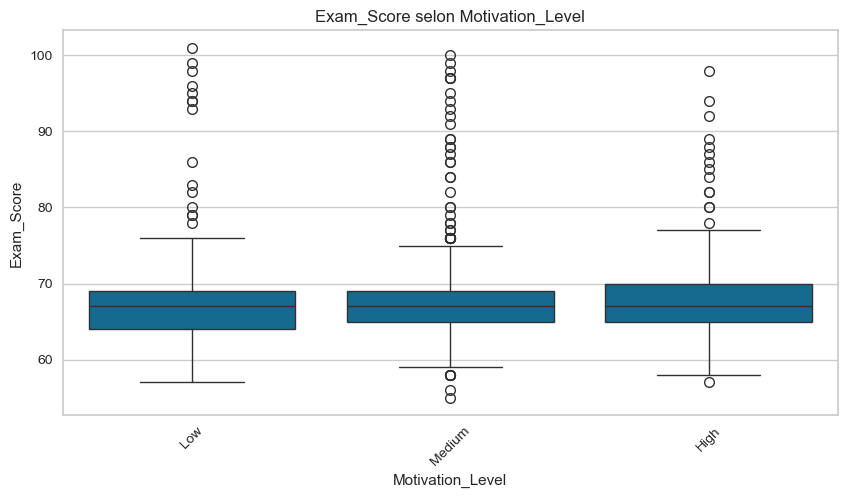

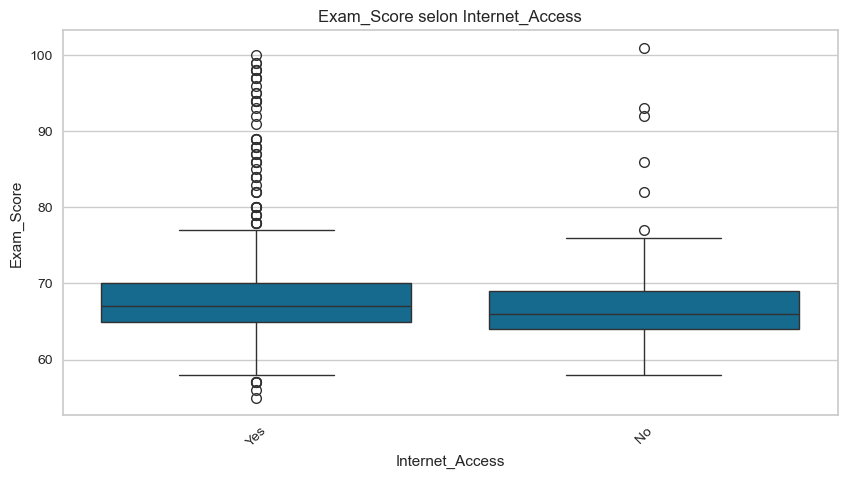

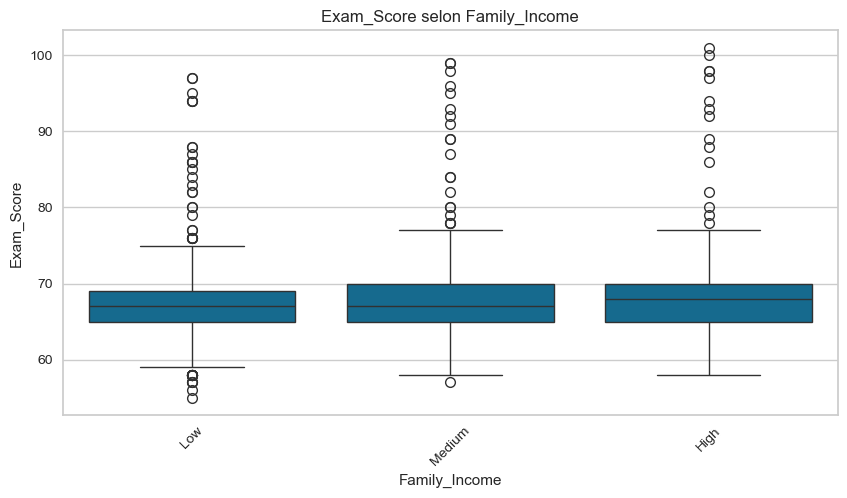

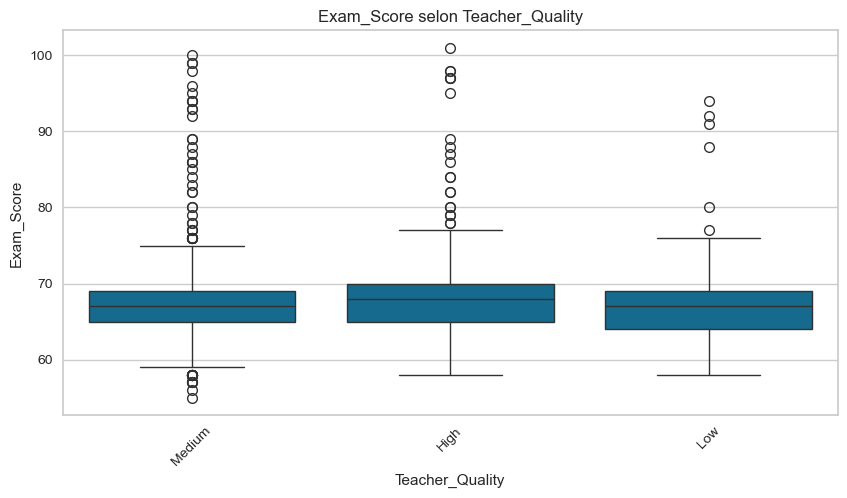

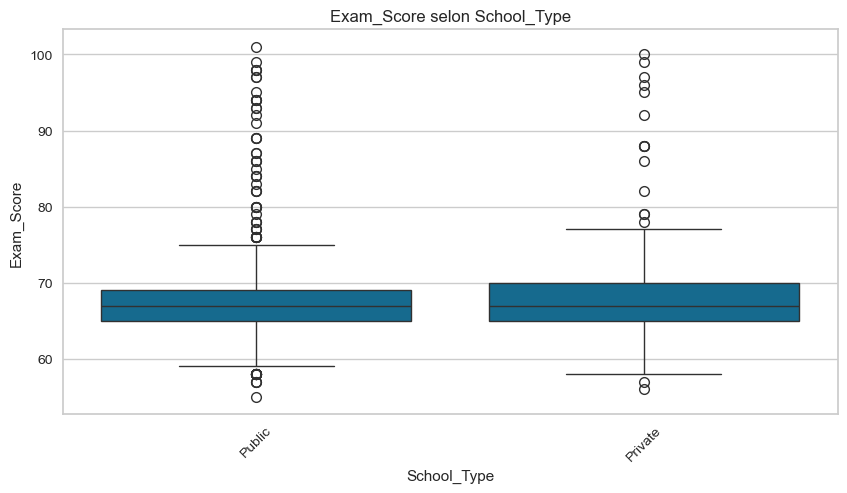

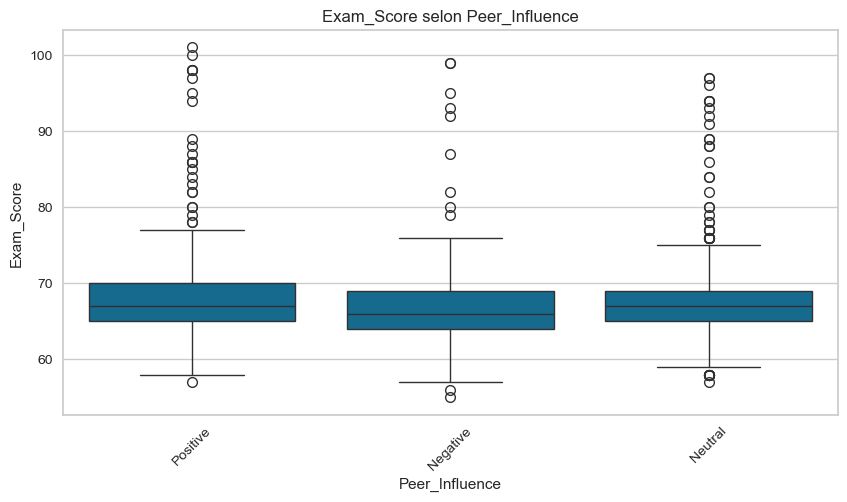

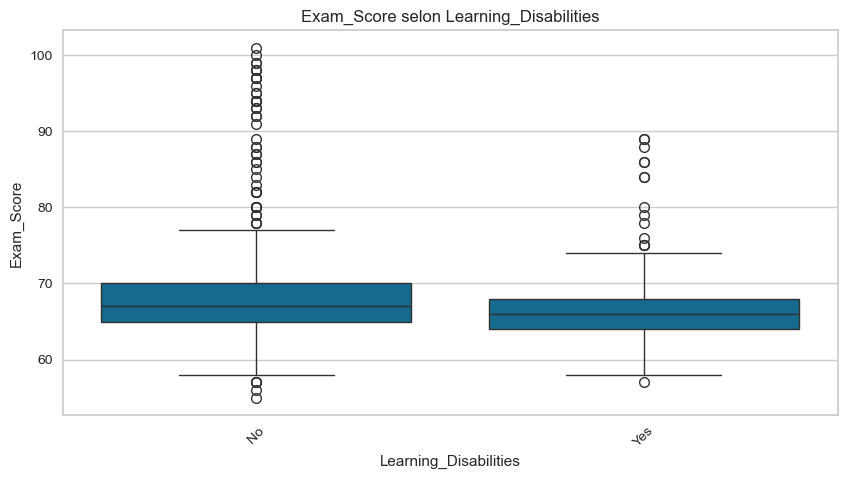

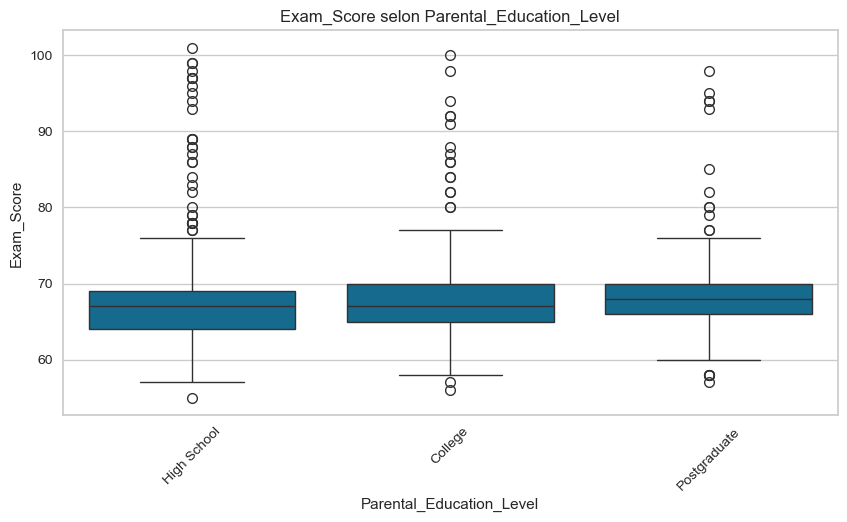

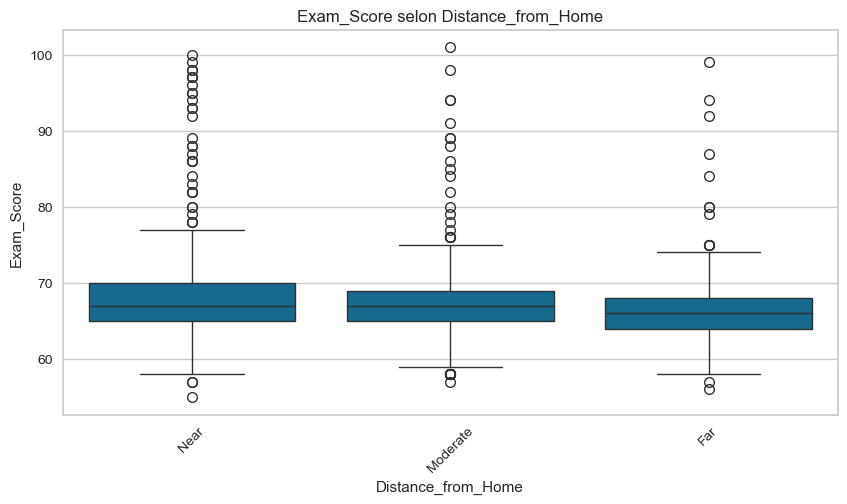

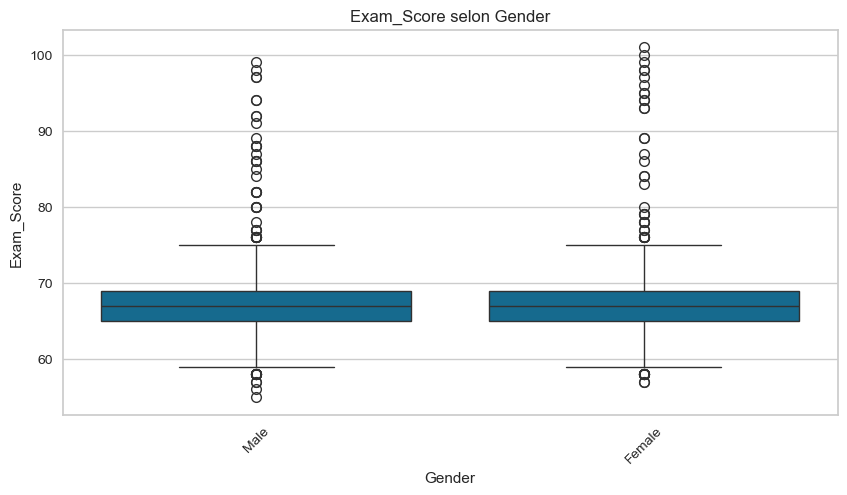

In [33]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='Exam_Score', data=base)
    plt.title(f'Exam_Score selon {col}')
    plt.xticks(rotation=45)
    plt.show()

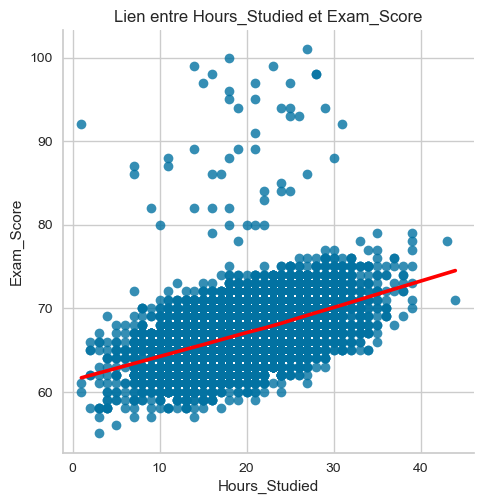

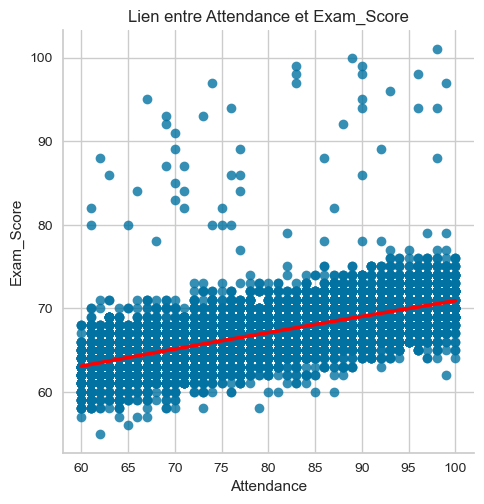

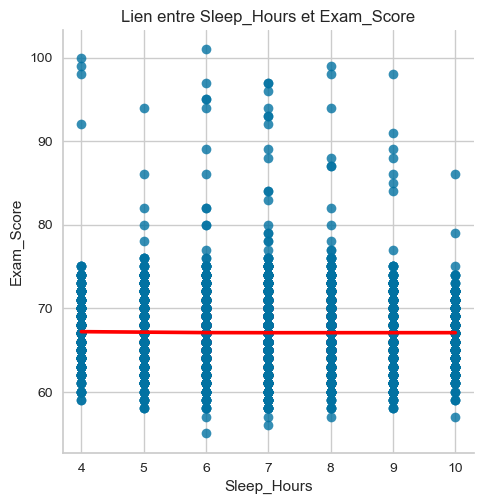

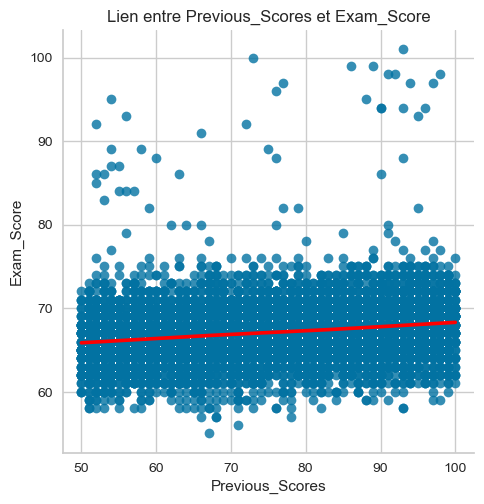

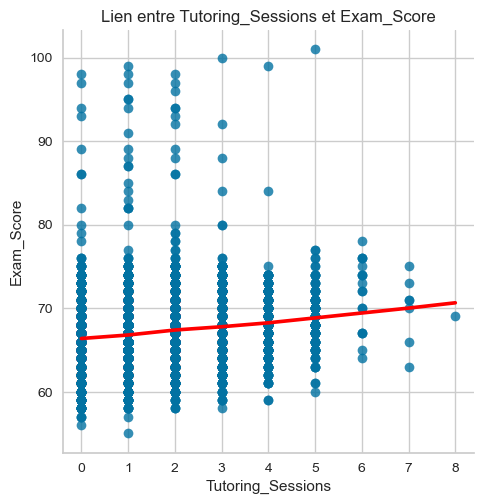

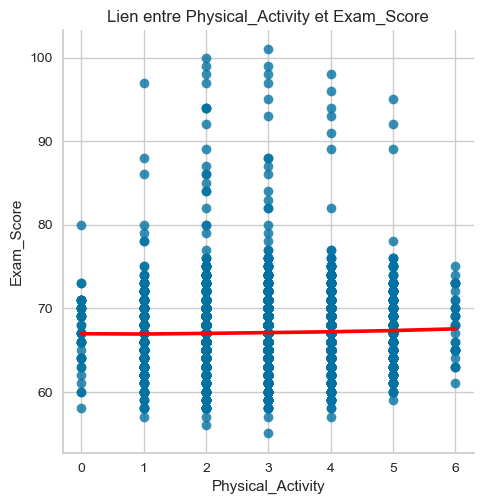

In [34]:
for col in numeric_cols:
    if col != 'Exam_Score':
        sns.lmplot(x=col, y='Exam_Score', data=base, lowess=True, line_kws={'color': 'red'})
        plt.title(f'Lien entre {col} et Exam_Score')
        plt.show()


In [35]:
#analyse multivariée

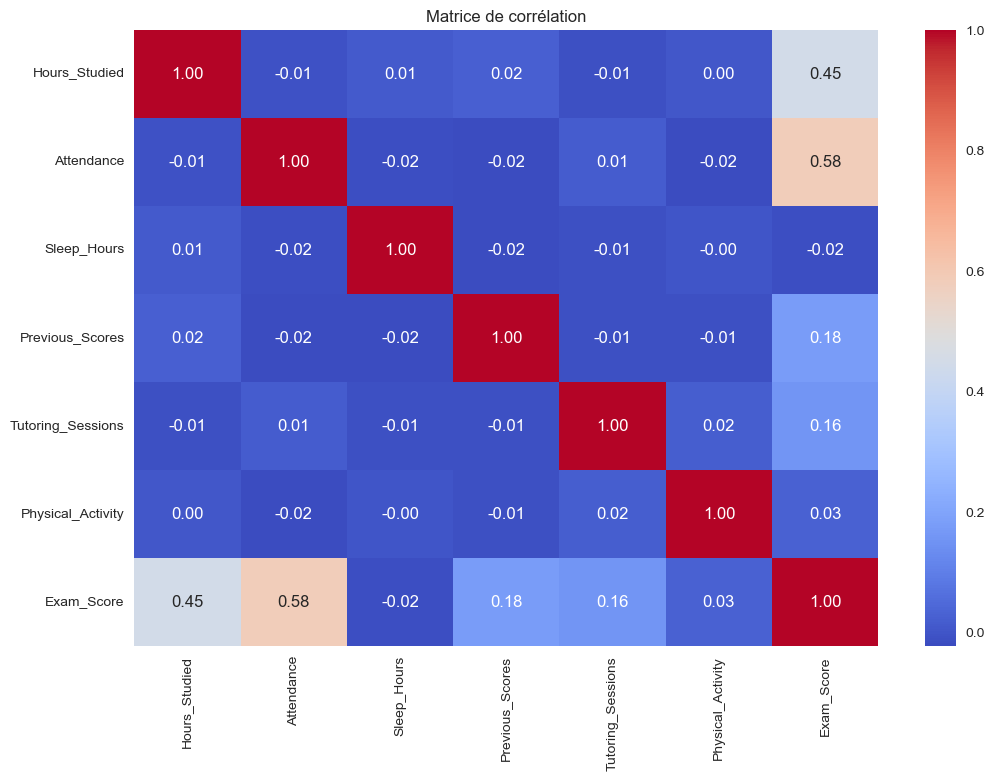

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(base.select_dtypes(include=np.number).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


In [37]:
# --- IMPACT DES VARIABLES QUALITATIVES SUR LE SCORE ---
# Liste pour stocker les variables ayant une relation significative avec la variable cible
significant_variables = []

# Effectuer un test ANOVA pour chaque variable qualitative
for col in categorical_cols:
    # Vérifier si la colonne contient des valeurs catégorielles
    if base[col].dtype == 'object' or base[col].dtype.name == 'category':
        # Appliquer ANOVA pour les groupes de chaque catégorie
        groups = [base['Exam_Score'][base[col] == level] for level in base[col].unique()]
        f_value, p_value = stats.f_oneway(*groups)
        
        # Afficher les résultats du test ANOVA
        print(f"\nANOVA pour {col}:")
        print(f"F-statistique: {f_value:.4f}")
        print(f"p-value: {p_value:.4f}")
        
        # Interpréter la p-value
        if p_value < 0.05:
            print("Il y a une différence significative entre les groupes.")
            significant_variables.append(col)  # Ajouter la variable à la liste
        else:
            print("Il n'y a pas de différence significative entre les groupes.")

# Afficher les variables qualitatives ayant une relation significative avec la variable cible
print("\nLes variables qualitatives ayant une relation significative avec la variable cible 'Exam_Score' sont :")
print(", ".join(significant_variables))


ANOVA pour Parental_Involvement:
F-statistique: 84.4877
p-value: 0.0000
Il y a une différence significative entre les groupes.

ANOVA pour Access_to_Resources:
F-statistique: 98.0044
p-value: 0.0000
Il y a une différence significative entre les groupes.

ANOVA pour Extracurricular_Activities:
F-statistique: 27.4917
p-value: 0.0000
Il y a une différence significative entre les groupes.

ANOVA pour Motivation_Level:
F-statistique: 25.7168
p-value: 0.0000
Il y a une différence significative entre les groupes.

ANOVA pour Internet_Access:
F-statistique: 17.5476
p-value: 0.0000
Il y a une différence significative entre les groupes.

ANOVA pour Family_Income:
F-statistique: 29.7939
p-value: 0.0000
Il y a une différence significative entre les groupes.

ANOVA pour Teacher_Quality:
F-statistique: nan
p-value: nan
Il n'y a pas de différence significative entre les groupes.

ANOVA pour School_Type:
F-statistique: 0.5166
p-value: 0.4723
Il n'y a pas de différence significative entre les groupes.

C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


#### Rapport EDA

In [38]:
from ydata_profiling import ProfileReport
rapport = ProfileReport(base, title="Rapport EDA", explorative=True)
rapport.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 40.22it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
print(f"Nombre de doublons : {base.duplicated().sum()}")

Nombre de doublons : 0


#### Conclusion de l'EDA


**Données manquantes**

On constate que 229 observations contiennent des valeurs manquantes, soit environ 3,47 % de l’ensemble des données.Ces valeurs manquantes sont dispersées dans trois variables à savoir 'Teacher_Quality' (78 valeurs manquantes), 'Parental_Education_Level' (90 valeurs manquantes), 'Distance_from_Home' (67 valeurs manquantes).
Cette proportion reste faible, ce qui rend le traitement faisable sans altérer fortement la qualité du jeu de données. Par ailleurs, la variable cible Exam_Score ne contient aucune valeur manquante.

**analyse de la variable cible: les valeurs aberrantes**

La variable cible Exam_Score présente 129 valeurs aberrantes 6607, identifiées via la méthode de Tukey. 
Une analyse de la distribution de ces valeurs a été réalisée pour mieux comprendre ces cas extrêmes.
En effet, une exploration par modalité des variables qualitatives a permis d’identifier des tendances intéressantes. Par exemple, les modalités les plus fréquentes (mode) de certaines variables semblent jouer un rôle déterminant sur la performance des élèves.
Parmi ces variables influentes, on peut citer :
    
    Parental_Involvement

    Motivation_Level

    Family_Income

    Peer_Influence

    Distance_from_Home

Ces facteurs semblent permettre de prédire si un élève est susceptible d’obtenir un score au-dessus ou en dessous de la moyenne.
(    La méthode de Tukey identifie les valeurs aberrantes en calculant l'intervalle interquartile (IQR) et en définissant des limites inférieures et supérieures. Les points de données situés en dehors de ces limites sont considérés comme des valeurs aberrantes.)

**valeurs aberrantes**

De plus, parmi les variables explicatives numériques, deux variables présentent également des outliers :

    Hours_Studied

    Tutoring_Sessions

**Corrélation et relation avec la cible**

Certaines variables montrent une corrélation notable avec Exam_Score, notamment :
 
    Hours_Studied 
     
    Attendance

    Previous_Score (corrélation plus faible)

    Tutoring_Sessions (corrélation plus faible)

Ces variables sont donc potentiellement de bons prédicteurs dans un modèle de régression.

**Indépendance des variables numériques**

Une analyse de corrélation entre les variables explicatives numériques montre qu’elles sont globalement indépendantes entre elles, ce qui est un atout pour éviter la multicolinéarité dans les modèles de régression.

#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  4. Train / test split </b></div>


In [40]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = base.drop(columns=['Exam_Score'])  
y = base.Exam_Score

In [41]:
X.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  
0              High School               Near    Male  
1                  College           Moderate  Female  
2             Postgraduate               Near    Male  
3              High School           Moderate    Male  
4                  College               Near  Female

In [42]:
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [43]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (4624, 19) ; y: (4624,) 
Test set - X: (1983, 19) ; y: (1983,)


#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  5. Feature engineering </b></div>

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Définition des colonnes selon le type de transformation souhaitée
ordinal_cols = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far']
}

nominal_cols = [
    'Extracurricular_Activities',   # Yes / No
    'Internet_Access',              # Yes / No
    'Peer_Influence',               # Positive / Negative / Neutral
    'Learning_Disabilities',        # Yes / No
]
colonnes_standard = ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']
colonnes_minmax = ['Attendance', 'Previous_Scores', 'Tutoring_Sessions']

# Imputateurs
imputation_num = SimpleImputer(strategy='median')
imputation_cat = SimpleImputer(strategy='most_frequent')

# Pipelines numériques
pipeline_standard = Pipeline([
    ('imputation', imputation_num),
    ('standardisation', StandardScaler())
])

pipeline_minmax = Pipeline([
    ('imputation', imputation_num),
    ('minmax', MinMaxScaler())
])

# Pipelines catégorielles
pipeline_ord = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[ordinal_cols[col] for col in ordinal_cols],
        handle_unknown='use_encoded_value',
        unknown_value=-1,
        encoded_missing_value=-2
    ))
])

pipeline_nom = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        drop='if_binary',
        sparse_output=False
    ))
])

# Combinaison des transformations
preprocessor = ColumnTransformer(transformers=[
    ('standard', pipeline_standard, colonnes_standard),
    ('minmax', pipeline_minmax, colonnes_minmax),
    ('ord', pipeline_ord, list(ordinal_cols.keys())),
    ('nom', pipeline_nom, nominal_cols)
])

# Application aux données
base_pretraitee = preprocessor.fit_transform(base)

# Récupération des noms de colonnes
colonnes_nom_encodees = preprocessor.named_transformers_['nom']['onehot'].get_feature_names_out(nominal_cols)
colonnes_ord_encodees = [f"{col}_ord" for col in ordinal_cols.keys()]  # Nom manuel car OrdinalEncoder ne les génère pas

colonnes_finales = colonnes_standard + colonnes_minmax + colonnes_ord_encodees + list(colonnes_nom_encodees)

# Conversion en DataFrame
base_pretraitee_df = pd.DataFrame(
    base_pretraitee,
    columns=colonnes_finales
)

base_pretraitee_df


Hours_Studied  Sleep_Hours  Physical_Activity  Attendance  \
0          0.504942    -0.019796           0.031411       0.600   
1         -0.162822     0.661399           1.001199       0.100   
2          0.671882    -0.019796           1.001199       0.950   
3          1.506587     0.661399           1.001199       0.725   
4         -0.162822    -0.700990           1.001199       0.800   
...             ...          ...                ...         ...   
6602       0.838823    -0.019796          -0.938377       0.225   
6603       0.504942     0.661399          -0.938377       0.400   
6604       0.004119    -0.700990          -0.938377       0.750   
6605      -1.665291    -0.700990           0.031411       0.650   
6606      -0.830586     1.342594           1.001199       0.175   

      Previous_Scores  Tutoring_Sessions  Parental_Involvement_ord  \
0                0.46              0.000                       0.0   
1                0.18              0.250                       0.0   
2                0.82              0.250                       1.0   
3                0.96              0.125                       0.0   
4                0.30              0.375                       1.0   
...               ...                ...                       ...   
6602             0.52              0.125                       2.0   
6603             0.62              0.375                       2.0   
6604             0.30              0.375                       1.0   
6605             0.82              0.250                       2.0   
6606             0.88              0.000                       1.0   

      Access_to_Resources_ord  Motivation_Level_ord  Family_Income_ord  \
0                         2.0                   0.0                0.0   
1                         1.0                   0.0                1.0   
2                         1.0                   1.0                1.0   
3                         1.0                   1.0                1.0   
4                         1.0                   1.0                1.0   
...                       ...                   ...                ...   
6602                      1.0                   1.0                2.0   
6603                      1.0                   1.0                0.0   
6604                      0.0                   0.0                0.0   
6605                      2.0                   2.0                0.0   
6606                      0.0                   1.0                1.0   

      Teacher_Quality_ord  Parental_Education_Level_ord  \
0                     1.0                           0.0   
1                     1.0                           1.0   
2                     1.0                           2.0   
3                     1.0                           0.0   
4                     2.0                           1.0   
...                   ...                           ...   
6602                  1.0                           0.0   
6603                  2.0                           0.0   
6604                  1.0                           2.0   
6605                  1.0                           0.0   
6606                  1.0                           2.0   

      Distance_from_Home_ord  Extracurricular_Activities_Yes  \
0                        0.0                             0.0   
1                        1.0                             0.0   
2                        0.0                             1.0   
3                        1.0                             1.0   
4                        0.0                             1.0   
...                      ...                             ...   
6602                     0.0                             0.0   
6603                     0.0                             0.0   
6604                     0.0                             1.0   
6605                     2.0                             1.0   
6606                     0.0                             1

#### MODELISATION

#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  6. Modélisation </b></div>

In [45]:
preprocessor

ColumnTransformer(transformers=[('standard',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardisation',
                                                  StandardScaler())]),
                                 ['Hours_Studied', 'Sleep_Hours',
                                  'Physical_Activity']),
                                ('minmax',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmax', MinMaxScaler())]),
                                 ['Attendance', 'Previous_Scores',
                                  'Tutoring_Sessio...
                                  'Motivation_Level', 'Family_Income',
                                  'Teacher_Quality', 'Parental_Education_Level',
                                  'Distance_from_Home']),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Extracurricular_Activities',
                                  'Internet_Access', 'Peer_Influence',
                                  'Learning_Disabilities'])])

#### Régression linéaire

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [47]:
# Pipeline de base pour la régression linéaire
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', LinearRegression())
])

# Affichage du pipeline
lr_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Teacher_Quality',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', LinearRegression())])

In [56]:
# Entraînement du modèle baseline
lr_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_lr_baseline = lr_pipe.predict(X_test)
lr_baseline_mape = metrics.r2_score(y_test, y_pred_lr_baseline)
print(f'\nBaseline R2: {lr_baseline_mape * 100:.2f}%')


Baseline R2: 77.38%


In [57]:
# Optimisation des hyperparamètres
# Note: La régression linéaire a peu d'hyperparamètres à tuner
# Optimisation des hyperparamètres avec R² comme scoring
lr_param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [False],  
}

lr_grid_search = GridSearchCV(
    lr_pipe,
    lr_param_grid,
    cv=5,
    scoring='r2',  
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__positive': [False]},
             scoring='r2', verbose=1)

In [58]:
# 5. Évaluation du modèle optimisé
y_pred_lr_optimized = lr_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
lr_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_lr_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_lr_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_lr_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_lr_optimized)*100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {lr_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {lr_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {lr_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {lr_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {lr_optimized_metrics['R²']:.4f}")


=== Performance du modèle optimisé ===
- MAE (Erreur Absolue Moyenne): 0.45
- MAPE (Erreur Pourcentage Absolue Moyenne): 0.62%
- MSE (Erreur Quadratique Moyenne): 3.11
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 1.76
- R² (Coefficient de Détermination): 77.3819


In [59]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {lr_grid_search.best_params_}')


Best Parameters: {'regressor__fit_intercept': True, 'regressor__positive': False}


#### Ridge

In [53]:
from sklearn import linear_model

In [60]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline Ridge
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Grille d'hyperparamètres (valeurs de alpha à tester)
ridge_param_grid = {
    'regressor__alpha': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]
}

# GridSearchCV avec R² comme scoring
ridge_grid_search = GridSearchCV(
    ridge_pipeline,
    ridge_param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

# Entraînement
ridge_grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(f"Meilleur alpha (Ridge) : {ridge_grid_search.best_params_}")

# Prédictions
y_test_ridge = ridge_grid_search.predict(X_test)

# Métriques
ridge_mse = mean_squared_error(y_test, y_test_ridge)
ridge_rmse = root_mean_squared_error(y_test, y_test_ridge)
ridge_mae = mean_absolute_error(y_test, y_test_ridge)
ridge_mape = mean_absolute_percentage_error(y_test, y_test_ridge)
ridge_r2 = r2_score(y_test, y_test_ridge)

# Affichage
print(
    f"MSE: {round(ridge_mse, 3)}\n"
    f"RMSE: {round(ridge_rmse, 3)}\n"
    f"MAE: {round(ridge_mae, 3)}\n"
    f"MAPE: {round(100 * ridge_mape, 3)}%\n"
    f"R²: {round(100 * ridge_r2, 4)}%"
)


Meilleur alpha (Ridge) : {'regressor__alpha': 0.9}
MSE: 3.106
RMSE: 1.763
MAE: 0.448
MAPE: 0.625%
R²: 77.3909%


#### Lasso

In [55]:
from sklearn.linear_model import Lasso

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Pipeline Lasso
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assurez-vous d'avoir un préprocesseur défini pour les données
    ('regressor', Lasso(max_iter=10000))  # max_iter pour garantir la convergence
])

# Grille d'hyperparamètres pour alpha (paramètre de régularisation)
lasso_param_grid = {
    'regressor__alpha': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Liste des valeurs possibles pour alpha
}

# GridSearchCV Lasso
lasso_grid_search = GridSearchCV(
    lasso_pipeline,  # Le pipeline à optimiser
    lasso_param_grid,  # La grille des hyperparamètres
    cv=5,  # Nombre de plis pour la validation croisée
    scoring='r2',  # Utilisation du R² comme critère de performance
    n_jobs=-1  # Utilisation de tous les cœurs du processeur pour accélérer le calcul
)

# Entraînement du modèle avec la recherche d'hyperparamètres
lasso_grid_search.fit(X_train, y_train)

# Affichage du meilleur paramètre alpha trouvé par GridSearchCV
print(f"Meilleur alpha (Lasso) : {lasso_grid_search.best_params_}")

# Prédictions sur les données de test
y_test_lasso = lasso_grid_search.predict(X_test)

# Calcul des métriques de performance
lasso_mse = mean_squared_error(y_test, y_test_lasso)
lasso_rmse = mean_squared_error(y_test, y_test_lasso, squared=False)  # RMSE est la racine carrée du MSE
lasso_mae = mean_absolute_error(y_test, y_test_lasso)
lasso_mape = mean_absolute_percentage_error(y_test, y_test_lasso)
lasso_r2 = r2_score(y_test, y_test_lasso)

# Affichage des résultats
print(
    f"MSE: {round(lasso_mse, 3)}\n"
    f"RMSE: {round(lasso_rmse, 3)}\n"
    f"MAE: {round(lasso_mae, 3)}\n"
    f"MAPE: {round(100 * lasso_mape, 3)}%\n"
    f"R²: {round(100 * lasso_r2, 4)}%"
)


Meilleur alpha (Lasso) : {'regressor__alpha': 0.1}
MSE: 3.876
RMSE: 1.969
MAE: 0.964
MAPE: 1.404%
R²: 71.7923%


C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Elastic net

In [62]:
from sklearn.linear_model import ElasticNet

In [63]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Pipeline ElasticNet avec prétraitement
elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assurez-vous d'avoir un préprocesseur défini pour les données
    ('scaler', StandardScaler()),    # Mise à l'échelle des données
    ('regressor', ElasticNet(max_iter=10000))  # Régression ElasticNet avec itérations ajustées
])

# Grille d'hyperparamètres pour alpha et l1_ratio
elastic_param_grid = {
    'regressor__alpha': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9],  # Valeurs d'alpha à tester
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # Contrôle du compromis entre Lasso (1.0) et Ridge (0.0)
}

# GridSearchCV pour ElasticNet
elastic_grid_search = GridSearchCV(
    elastic_pipeline,
    elastic_param_grid,
    cv=5,  # Validation croisée avec 5 plis
    scoring='r2',  # Score utilisé pour la sélection du meilleur modèle
    n_jobs=-1  # Utilisation de tous les cœurs du processeur
)

# Entraînement du modèle
elastic_grid_search.fit(X_train, y_train)
print(f"Meilleurs hyperparamètres (ElasticNet) : {elastic_grid_search.best_params_}")

# Prédictions sur le jeu de test
y_test_elastic = elastic_grid_search.predict(X_test)

# Calcul des métriques d'évaluation
elastic_mse = mean_squared_error(y_test, y_test_elastic)
elastic_rmse = mean_squared_error(y_test, y_test_elastic, squared=False)  # RMSE est la racine carrée du MSE
elastic_mae = mean_absolute_error(y_test, y_test_elastic)
elastic_mape = mean_absolute_percentage_error(y_test, y_test_elastic)
elastic_r2 = r2_score(y_test, y_test_elastic)

# Affichage des résultats
print(
    f"MSE: {round(elastic_mse, 3)}\n"
    f"RMSE: {round(elastic_rmse, 3)}\n"
    f"MAE: {round(elastic_mae, 3)}\n"
    f"MAPE: {round(100 * elastic_mape, 3)}%\n"
    f"R²: {round(100 * elastic_r2, 4)}%"
)


Meilleurs hyperparamètres (ElasticNet) : {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.1}
MSE: 3.167
RMSE: 1.78
MAE: 0.526
MAPE: 0.747%
R²: 76.95%


C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### KNN

In [64]:
from sklearn.neighbors import KNeighborsRegressor

In [65]:
# Pipeline de base pour KNN
knn_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", KNeighborsRegressor()),
                          ]
                   )
# Affichage du pipeline
knn_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Teacher_Quality',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', KNeighborsRegressor())])

In [66]:
# Baseline knn
knn_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_knn_baseline = knn_pipe.predict(X_test)
knn_baseline_mape = metrics.r2_score(y_test, y_pred_knn_baseline)
print(f'Baseline R2: {knn_baseline_mape * 100:.2f}%')

Baseline R2: 31.07%


In [67]:
# Optimisation des hyperparamètres
# Note: KNN a plusieurs hyperparamètres à tuner
knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

knn_grid_search = GridSearchCV(knn_pipe, knn_param_grid, cv=5,
                               scoring='neg_mean_absolute_percentage_error', 
                               n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__n_neighbors': [3, 5, 7, 9],
                         'regressor__p': [1, 2],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [68]:
# 5. Évaluation du modèle KNN optimisé
y_pred_knn_optimized = knn_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
knn_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_knn_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_knn_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_knn_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_knn_optimized)*100,
}

# Affichage des résultats
print("\n=== Performance du modèle KNN optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {knn_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {knn_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {knn_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {knn_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {knn_optimized_metrics['R²']:.4f}")



=== Performance du modèle KNN optimisé ===
- MAE (Erreur Absolue Moyenne): 1.97
- MAPE (Erreur Pourcentage Absolue Moyenne): 2.91%
- MSE (Erreur Quadratique Moyenne): 8.03
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 2.83
- R² (Coefficient de Détermination): 41.5570


In [69]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {knn_grid_search.best_params_}')


Best Parameters: {'regressor__n_neighbors': 9, 'regressor__p': 1, 'regressor__weights': 'distance'}


#### Validation croisée

In [70]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import Pipeline

# Préparation de la validation croisée (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Définition du pipeline (préprocessing + modèle)
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Votre préprocesseur existant
    ('regressor', KNeighborsRegressor())  # Notez le nom 'regressor' ici
])

# Grille d'hyperparamètres à tester (utilisez 'regressor__' au lieu de 'knn__')
knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 10],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

# Configuration de GridSearchCV
knn_grid_search = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entraînement avec GridSearch
knn_grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(f"Meilleurs paramètres : {knn_grid_search.best_params_}")

# Prédictions sur le test set
y_test_knn = knn_grid_search.predict(X_test)

# Calcul des métriques
knn_mse = mean_squared_error(y_test, y_test_knn)
knn_rmse = root_mean_squared_error(y_test, y_test_knn)
knn_mae = mean_absolute_error(y_test, y_test_knn)
knn_mape = mean_absolute_percentage_error(y_test, y_test_knn)
knn_r2 = r2_score(y_test, y_test_knn)

# Affichage des résultats
print(
    f"MSE: {round(knn_mse, 2)}\n"
    f"RMSE: {round(knn_rmse, 2)}\n"
    f"MAE: {round(knn_mae, 2)}\n"
    f"MAPE: {round(100 * knn_mape, 2)}%\n"
    f"R²: {round(100 * knn_r2, 1)}%"
)


Meilleurs paramètres : {'regressor__n_neighbors': 10, 'regressor__p': 1, 'regressor__weights': 'distance'}
MSE: 7.93
RMSE: 2.82
MAE: 1.96
MAPE: 2.89%
R²: 42.3%


#### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
# Pipeline de base pour la régression par arbre de décision
tree_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Affichage du pipeline
tree_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [74]:
# Entraînement du modèle baseline (Decision Tree)
tree_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_tree_baseline = tree_pipe.predict(X_test)
tree_baseline_r2 = metrics.r2_score(y_test, y_pred_tree_baseline)
print(f'\nBaseline R2 (Decision Tree): {tree_baseline_r2 * 100:.2f}%')



Baseline R2 (Decision Tree): -11.17%


In [75]:
# Optimisation des hyperparamètres pour le Decision Tree
tree_param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__criterion': ['squared_error', 'friedman_mse', 'poisson']
}

tree_grid_search = GridSearchCV(tree_pipe, tree_param_grid, cv=5,
                                scoring='r2', 
                                n_jobs=-1, verbose=1)
tree_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
342 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                          'Learning_Disabilities'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__criterion': ['squared_error',
                                                  'friedman_mse', 'poisson'],
                         'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt', 'log2',
                                                     None],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [76]:
# 5. Évaluation du modèle optimisé
y_pred_tree_optimized = tree_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
tree_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_tree_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_tree_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_tree_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_tree_optimized)*100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {tree_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {tree_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {tree_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {tree_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {tree_optimized_metrics['R²']:.4f}")



=== Performance du modèle optimisé ===
- MAE (Erreur Absolue Moyenne): 1.60
- MAPE (Erreur Pourcentage Absolue Moyenne): 2.35%
- MSE (Erreur Quadratique Moyenne): 7.10
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 2.66
- R² (Coefficient de Détermination): 48.3562


In [77]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {tree_grid_search.best_params_}')


Best Parameters: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


#### Validation croisée

In [78]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import Pipeline

# Préparation de la validation croisée (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline : prétraitement + régression par arbre de décision
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Grille d'hyperparamètres
dt_param_grid = {
    'regressor__max_depth': [3, 5, 10, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Configuration de GridSearchCV
dt_grid_search = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entraînement
dt_grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print(f"Meilleurs paramètres : {dt_grid_search.best_params_}")

# Prédictions sur le test set
y_test_dt = dt_grid_search.predict(X_test)

# Calcul des métriques
dt_mse = mean_squared_error(y_test, y_test_dt)
dt_rmse = root_mean_squared_error(y_test, y_test_dt)
dt_mae = mean_absolute_error(y_test, y_test_dt)
dt_mape = mean_absolute_percentage_error(y_test, y_test_dt)
dt_r2 = r2_score(y_test, y_test_dt)

# Affichage des résultats
print(
    f"MSE: {round(dt_mse, 2)}\n"
    f"RMSE: {round(dt_rmse, 2)}\n"
    f"MAE: {round(dt_mae, 2)}\n"
    f"MAPE: {round(100 * dt_mape, 2)}%\n"
    f"R²: {round(100 * dt_r2, 1)}%"
)


Meilleurs paramètres : {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}
MSE: 6.29
RMSE: 2.51
MAE: 1.61
MAPE: 2.36%
R²: 54.2%


#### Gradient boosting

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
# Pipeline de base pour Gradient Boosting
gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Affichage du pipeline
gb_pipe


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [84]:
# Entraînement du modèle baseline
gb_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_gb_baseline = gb_pipe.predict(X_test)
gb_baseline_r2 = metrics.r2_score(y_test, y_pred_gb_baseline)
print(f'\nBaseline R2: {gb_baseline_r2 * 100:.2f}%')



Baseline R2: 73.39%


In [85]:
# Optimisation des hyperparamètres pour Gradient Boosting
gb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],  # Nombre d'arbres
    'regressor__learning_rate': [0.01, 0.05, 0.1],  # Taux d'apprentissage
    'regressor__max_depth': [3, 5, 7],  # Profondeur maximale des arbres
    'regressor__subsample': [0.8, 0.9, 1.0],  # Fraction des échantillons utilisés pour l'entraînement
}

gb_grid_search = GridSearchCV(gb_pipe, gb_param_grid, cv=5,
                              scoring='neg_mean_absolute_percentage_error', 
                              n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.05, 0.1],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [50, 100, 200],
                         'regressor__subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [87]:
# 5. Évaluation complète du modèle optimisé
y_pred_gb_optimized = gb_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
gb_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_gb_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_gb_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_gb_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_gb_optimized) * 100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {gb_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {gb_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {gb_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {gb_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {gb_optimized_metrics['R²']:.4f}")



=== Performance du modèle optimisé ===
- MAE (Erreur Absolue Moyenne): 0.67
- MAPE (Erreur Pourcentage Absolue Moyenne): 0.96%
- MSE (Erreur Quadratique Moyenne): 3.49
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 1.87
- R² (Coefficient de Détermination): 74.5790


In [88]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {gb_grid_search.best_params_}')


Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.9}


#### Validation croisée

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
import numpy as np  # pour calculer RMSE

# 1. Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Pipeline (prétraitement + modèle)
gbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# 3. Grille d’hyperparamètres
gbr_param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# 4. GridSearchCV
gbr_grid_search = GridSearchCV(
    gbr_pipeline,
    gbr_param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 5. Entraînement
gbr_grid_search.fit(X_train, y_train)

# 6. Meilleurs hyperparamètres
print(f"\nMeilleurs paramètres : {gbr_grid_search.best_params_}")

# 7. Prédictions
y_pred = gbr_grid_search.predict(X_test)

# 8. Métriques
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(mse)
gb_mae = mean_absolute_error(y_test, y_pred)
gb_mape = mean_absolute_percentage_error(y_test, y_pred)
gb_r2 = r2_score(y_test, y_pred)

# 9. Résultats
print("\nPerformance du modèle Gradient Boosting :")
print(f"MSE : {gb_mse:.2f}")
print(f"RMSE : {gb_rmse:.2f}")
print(f"MAE : {gb_mae:.2f}")
print(f"MAPE : {gb_mape * 100:.2f}%")
print(f"R² : {gb_r2 * 100:.2f}%")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Meilleurs paramètres : {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 200}

Performance du modèle Gradient Boosting :
MSE : 3.53
RMSE : 1.85
MAE : 0.69
MAPE : 0.99%
R² : 74.31%


#### Xgboost

In [90]:
import xgboost

In [91]:
from xgboost import XGBRegressor

In [92]:
# Pipeline de base pour XGBoost
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', xgboost.XGBRegressor())
])

# Affichage du pipeline
xgb_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [93]:
# Entraînement du modèle baseline
xgb_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_xgb_baseline = xgb_pipe.predict(X_test)
xgb_baseline_mape = metrics.r2_score(y_test, y_pred_xgb_baseline)
print(f'\nBaseline R2: {xgb_baseline_mape * 100:.2f}%')



Baseline R2: 66.42%


In [94]:
# Optimisation des hyperparamètres pour XGBoost
xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5,
                               scoring='neg_mean_absolute_percentage_error', 
                               n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__colsample_bytree': [0.8, 1.0],
                         'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [96]:
# 5. Évaluation du modèle optimisé
y_pred_xgb_optimized = xgb_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
xgb_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_xgb_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_xgb_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_xgb_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_xgb_optimized) * 100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé XGBoost ===")
print(f"- MAE (Erreur Absolue Moyenne): {xgb_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {xgb_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {xgb_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {xgb_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {xgb_optimized_metrics['R²']:.4f}")



=== Performance du modèle optimisé XGBoost ===
- MAE (Erreur Absolue Moyenne): 0.64
- MAPE (Erreur Pourcentage Absolue Moyenne): 0.91%
- MSE (Erreur Quadratique Moyenne): 3.38
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 1.84
- R² (Coefficient de Détermination): 75.4050


In [97]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {xgb_grid_search.best_params_}')


Best Parameters: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}


#### Validation croisée

In [98]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# 1. Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Pipeline (préprocessing + modèle)
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0))
])

# 3. Grille d'hyperparamètres
xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# 4. GridSearchCV
xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 5. Entraînement
print("Entraînement de XGBoost...")
xgb_grid_search.fit(X_train, y_train)
print("Terminé.")

# 6. Meilleurs hyperparamètres
print(f"\nMeilleurs paramètres : {xgb_grid_search.best_params_}")

# 7. Prédictions
y_test_xgb = xgb_grid_search.predict(X_test)

# 8. Métriques
xgb_mse = mean_squared_error(y_test, y_test_xgb)
xgb_rmse = root_mean_squared_error(y_test, y_test_xgb)
xgb_mae = mean_absolute_error(y_test, y_test_xgb)
xgb_mape = mean_absolute_percentage_error(y_test, y_test_xgb)
xgb_r2 = r2_score(y_test, y_test_xgb)

# 9. Résultats
print("\nPerformance du modèle XGBoost :")
print(f"MSE: {round(xgb_mse, 2)}")
print(f"RMSE: {round(xgb_rmse, 2)}")
print(f"MAE: {round(xgb_mae, 2)}")
print(f"MAPE: {round(100 * xgb_mape, 2)}%")
print(f"R²: {round(100 * xgb_r2, 4)}%")


Entraînement de XGBoost...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Terminé.

Meilleurs paramètres : {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}

Performance du modèle XGBoost :
MSE: 3.38
RMSE: 1.84
MAE: 0.65
MAPE: 0.93%
R²: 75.4021%


#### Lightgbm

In [99]:
import lightgbm as lgb

In [100]:
from lightgbm import LGBMRegressor

In [101]:
# Pipeline de base pour LightGBM
lgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', lgb.LGBMRegressor())
])

# Affichage du pipeline
lgb_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Teacher_Quality',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', LGBMRegressor())])

In [102]:
# Entraînement du modèle baseline avec LightGBM
lgb_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_lgb_baseline = lgb_pipe.predict(X_test)
lgb_baseline_r2 = metrics.r2_score(y_test, y_pred_lgb_baseline)
print(f'\nBaseline R2: {lgb_baseline_r2 * 100:.2f}%')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 4624, number of used features: 19
[LightGBM] [Info] Start training from score 67.236808

Baseline R2: 72.32%


In [103]:
# Optimisation des hyperparamètres pour LightGBM
lgb_param_grid = {
    'regressor__num_leaves': [31, 50, 100],  # Nombre de feuilles pour contrôler la complexité du modèle
    'regressor__learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'regressor__n_estimators': [100, 200, 500],  # Nombre d'arbres
    'regressor__max_depth': [3, 5, 7]  # Profondeur maximale des arbres
}

lgb_grid_search = GridSearchCV(lgb_pipe, lgb_param_grid, cv=5,
                               scoring='neg_mean_absolute_percentage_error', 
                               n_jobs=-1, verbose=1)
lgb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 4624, number of used features: 19
[LightGBM] [Info] Start training from score 67.236808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor', LGBMRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200, 500],
                         'regressor__num_leaves': [31, 50, 100]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [105]:
# 5. Évaluation du modèle optimisé
y_pred_lgb_optimized = lgb_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
lgb_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_lgb_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_lgb_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_lgb_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgb_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_lgb_optimized) * 100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {lgb_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {lgb_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {lgb_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {lgb_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {lgb_optimized_metrics['R²']:.4f}")



=== Performance du modèle optimisé ===
- MAE (Erreur Absolue Moyenne): 0.68
- MAPE (Erreur Pourcentage Absolue Moyenne): 0.96%
- MSE (Erreur Quadratique Moyenne): 3.42
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 1.85
- R² (Coefficient de Détermination): 75.1433


In [106]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {lgb_grid_search.best_params_}')


Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__num_leaves': 31}


#### Validation croisée

In [115]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
import numpy as np  # au cas où pour calculer RMSE manuellement

# Vérifie que 'preprocessor', 'X_train', 'X_test', 'y_train', 'y_test' sont bien définis avant ce script

# 1. Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Pipeline (prétraitement + modèle)
lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42))
])

# 3. Grille d’hyperparamètres
lgb_param_grid = {
    'regressor__num_leaves': [31, 50, 100],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [3, 5, 7]
}

# 4. GridSearchCV
lgbm_grid_search = GridSearchCV(
    lgbm_pipeline,
    lgb_param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 5. Entraînement

lgbm_grid_search.fit(X_train, y_train)


# 6. Meilleurs hyperparamètres
print(f"\nMeilleurs paramètres : {lgbm_grid_search.best_params_}")

# 7. Prédictions
y_pred = lgbm_grid_search.predict(X_test)

# 8. Métriques
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = np.sqrt(mse)  # Remplace root_mean_squared_error si sklearn < 1.0
lgbm_mae = mean_absolute_error(y_test, y_pred)
lgbm_mape = mean_absolute_percentage_error(y_test, y_pred)
lgbm_r2 = r2_score(y_test, y_pred)

# 9. Résultats
print("\nPerformance du modèle LightGBM :")
print(f"MSE : {lgbm_mse:.2f}")
print(f"RMSE : {lgbm_rmse:.2f}")
print(f"MAE : {lgbm_mae:.2f}")
print(f"MAPE : {lgbm_mape * 100:.2f}%")
print(f"R² : {lgbm_r2 * 100:.2f}%")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 4624, number of used features: 19
[LightGBM] [Info] Start training from score 67.236808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

#### Random forest

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline

# Exemple de pipeline pour Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # assure-toi que ce préprocesseur est bien défini
    ('regressor', RandomForestRegressor(random_state=42))
])

# Grille d'hyperparamètres
rf_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Entraînement
rf_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          Simpl...
                                                                                                        sparse_output=False))]),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__min_samples_leaf': [1, 2],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [117]:
from sklearn import metrics
import numpy as np

# Prédictions avec le meilleur modèle trouvé
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calcul des métriques pour le modèle Random Forest optimisé
rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
rf_mape = metrics.mean_absolute_percentage_error(y_test, y_pred_rf)
rf_r2 = metrics.r2_score(y_test, y_pred_rf)

# Affichage des résultats
print(f"MSE: {round(rf_mse, 2)} \nRMSE: {round(rf_rmse, 2)} "
      f"\nMAE: {round(rf_mae, 2)}\nMAPE: {round(100 * rf_mape, 2)}%"
      f"\nR²: {round(100 * rf_r2, 1)}%")


MSE: 4.34 
RMSE: 2.08 
MAE: 1.07
MAPE: 1.56%
R²: 68.4%


#### Modèle naif

In [ ]:
from sklearn import metrics
import numpy as np

# Moyenne de la variable cible sur les données d'entraînement
y_mean = np.mean(y_train)

# Prédictions naïves : la moyenne pour chaque observation du test
y_pred_naive = np.full_like(y_test, fill_value=y_mean, dtype=np.float64)

# Calcul des métriques
naive_mse = metrics.mean_squared_error(y_test, y_pred_naive)
naive_rmse = np.sqrt(naive_mse)
naive_mae = metrics.mean_absolute_error(y_test, y_pred_naive)
naive_mape = metrics.mean_absolute_percentage_error(y_test, y_pred_naive)
naive_r2 = metrics.r2_score(y_test, y_pred_naive)

# Affichage
print(f"Modèle naïf :\nMSE = {round(naive_mse, 2)}\nMAE = {round(naive_mae, 2)}"
      f"\nMAPE = {round(100 * naive_mape, 2)}%\nR² = {round(100 * naive_r2, 1)}%")

#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  7. Comparaison </b></div>


In [119]:
results = {
    "Modèle": ["Régression Linéaire", "KNN", "Decision Tree", "Gradient Boosting", "XGBoost", "LightGBM", "Random forest", "Naive model"],
    "MSE": [ridge_mse, knn_mse, dt_mse, gb_mse, xgb_mse, lgbm_mse, rf_mse, naive_mse],
    "RMSE": [ridge_rmse, knn_rmse, dt_rmse, gb_rmse, xgb_rmse, lgbm_rmse, rf_rmse, naive_rmse],
    "MAE": [ridge_mae, knn_mae, dt_mae, gb_mae, xgb_mae, lgbm_mae, rf_mae, naive_mae],
    "MAPE (%)": [100 * ridge_mape, 100 * knn_mape, 100 * dt_mape, 100 * gb_mape, 100 * xgb_mape, 100 * lgbm_mape, 100 * rf_mape, 100 * naive_mape],
    "R² (%)": [100 * ridge_r2, 100 * knn_r2, 100 * dt_r2, 100 * gb_r2, 100 * xgb_r2, 100 * lgbm_r2, 100 * rf_r2, 100 * naive_r2]
}

df_results = pd.DataFrame(results).round(2)

print("\nTableau comparatif des performances :\n")
print(df_results)



Tableau comparatif des performances :

                Modèle   MSE  RMSE   MAE  MAPE (%)  R² (%)
0  Régression Linéaire  3.11  1.76  0.45      0.62   77.39
1                  KNN  7.93  2.82  1.96      2.89   42.30
2        Decision Tree  6.29  2.51  1.61      2.36   54.20
3    Gradient Boosting  3.53  1.85  0.69      0.99   74.31
4              XGBoost  3.38  1.84  0.65      0.93   75.40
5             LightGBM  3.42  1.85  0.68      0.96   75.14
6        Random forest  4.34  2.08  1.07      1.56   68.41



=== Performance du Régression Linéaire optimisé ===
Meilleurs paramètres: {'regressor__fit_intercept': True, 'regressor__positive': False}
- MAE: 0.4477
- MAPE: 0.6245
- MSE: 3.1077
- RMSE: 1.7629
- R²: 77.3819
- Max Error: 27.8651
- Explained Variance: 0.7740

=== Performance du KNN optimisé ===
Meilleurs paramètres: {'regressor__n_neighbors': 10, 'regressor__p': 1, 'regressor__weights': 'distance'}
- MAE: 1.9588
- MAPE: 2.8947
- MSE: 7.9282
- RMSE: 2.8157
- R²: 42.2981
- Max Error: 28.7780
- Explained Variance: 0.4240

=== Performance du Decision Tree optimisé ===
Meilleurs paramètres: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}
- MAE: 1.6049
- MAPE: 2.3517
- MSE: 7.0958
- RMSE: 2.6638
- R²: 48.3562
- Max Error: 25.7143
- Explained Variance: 0.4844

=== Performance du Gradient Boosting optimisé ===
Meilleurs paramètres: {'regressor__learning_rate': 0.1, 'r

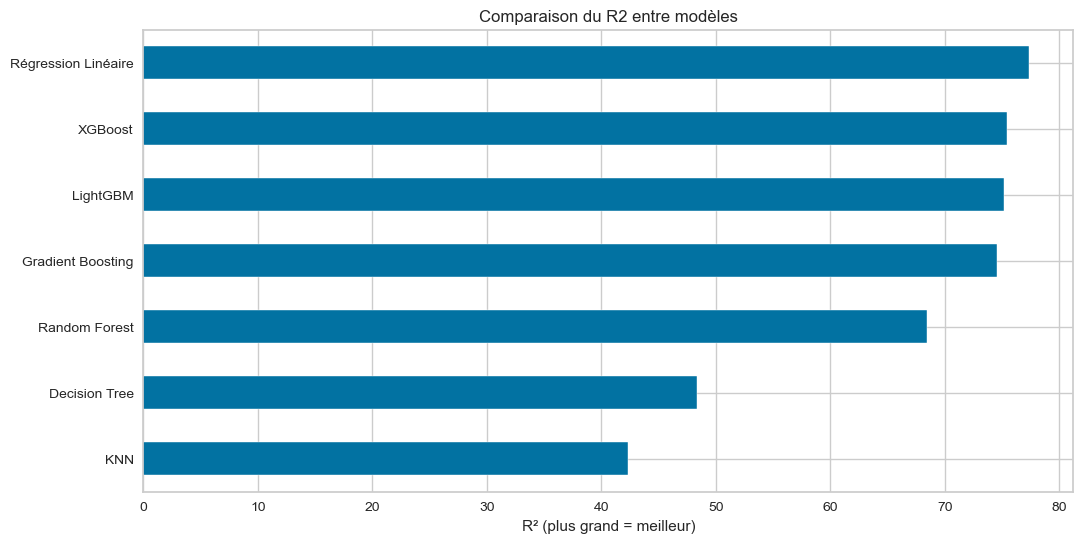

In [120]:
from sklearn import metrics

def evaluate_optimized_model(model_name, grid_search, X_test, y_test):
    """
    Évalue un modèle optimisé et affiche les métriques principales
    
    Args:
        model_name (str): Nom du modèle
        grid_search: Objet GridSearchCV après fitting
        X_test: Features de test
        y_test: Cible de test
    
    Returns:
        dict: Dictionnaire des métriques calculées
    """
    # Prédictions avec le meilleur estimateur
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Calcul des métriques
    model_metrics = {
        'MAE': metrics.mean_absolute_error(y_test, y_pred),
        'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred) * 100,
        'MSE': metrics.mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'R²': metrics.r2_score(y_test, y_pred)*100,
        'Max Error': metrics.max_error(y_test, y_pred),
        'Explained Variance': metrics.explained_variance_score(y_test, y_pred)
    }
    
    # Affichage des résultats
    print(f"\n=== Performance du {model_name} optimisé ===")
    print(f"Meilleurs paramètres: {grid_search.best_params_}")
    
    for metric, value in model_metrics.items():
        print(f"- {metric}: {value:.4f}")
    
    return model_metrics


# Évaluation des modèles optimisés
lr_metrics = evaluate_optimized_model("Régression Linéaire", lr_grid_search, X_test, y_test)
knn_metrics = evaluate_optimized_model("KNN", knn_grid_search, X_test, y_test)
dt_metrics = evaluate_optimized_model("Decision Tree", tree_grid_search, X_test, y_test)
gb_metrics = evaluate_optimized_model("Gradient Boosting", gb_grid_search, X_test, y_test)
xgb_metrics = evaluate_optimized_model("XGBoost", xgb_grid_search, X_test, y_test)
lgbm_metrics = evaluate_optimized_model("LightGBM", lgbm_grid_search, X_test, y_test)
rf_metrics = evaluate_optimized_model("Random Forest", rf_grid_search, X_test, y_test)



# Comparaison globale des modèles
print("\n=== Comparaison des performances ===")
all_metrics = {
    'Régression Linéaire': lr_metrics,
    'KNN': knn_metrics,
    'Decision Tree': dt_metrics,
    'Gradient Boosting': gb_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM': lgbm_metrics,
    'Random Forest':rf_metrics
}

# Création d'un DataFrame pour visualisation
metrics_df = pd.DataFrame(all_metrics).T
print("\nRésumé des métriques (trié par R2):")
print(metrics_df.sort_values('R²'))

# Visualisation graphique
plt.figure(figsize=(12, 6))
metrics_df['R²'].sort_values().plot(kind='barh', title='Comparaison du R2 entre modèles')
plt.xlabel('R² (plus grand = meilleur)')
plt.show()


#### <a class='anchor' id='EDA'></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  8. Feature importance </b></div>


C:\Users\Easy Services Pro\AppData\Local\Temp\ipykernel_11368\2661876449.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ridge_coef_df, x='Coefficient', y='Feature', palette='coolwarm')


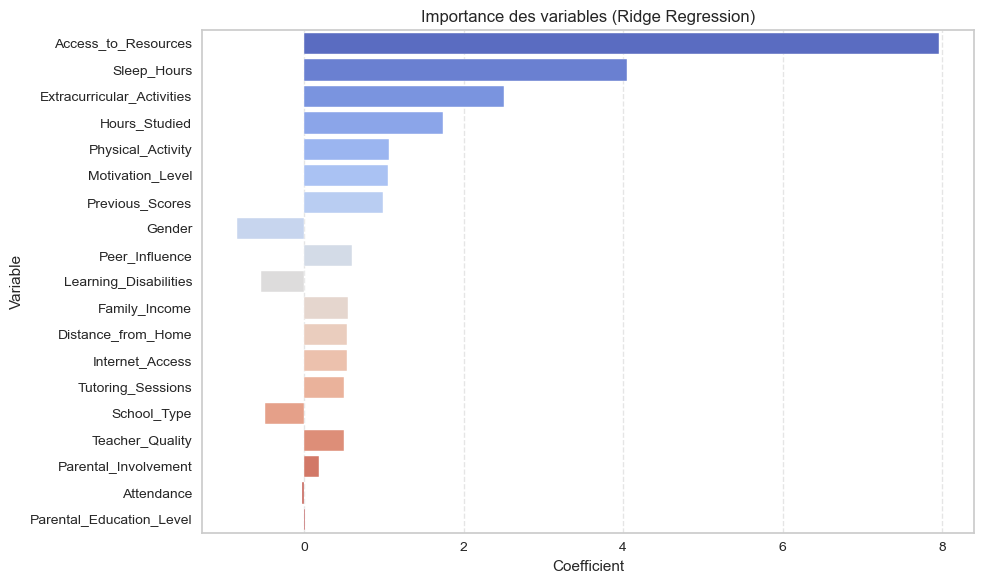

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Récupération du meilleur modèle Ridge entraîné
best_ridge_model = ridge_grid_search.best_estimator_.named_steps['regressor']

# Récupération des coefficients et noms de variables
ridge_coefficients = best_ridge_model.coef_
feature_names = X_train.columns

# Création d'un DataFrame pour faciliter la visualisation
ridge_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
})

# Tri par importance absolue
ridge_coef_df['abs_coef'] = ridge_coef_df['Coefficient'].abs()
ridge_coef_df = ridge_coef_df.sort_values(by='abs_coef', ascending=False)

# Affichage graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=ridge_coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Importance des variables (Ridge Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
